In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet, ElasticNetCV
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('../data/data_forcast.csv', index_col=False)

In [48]:
data

State        Date        zori      cpi  property_tax  population  \
0       AL  2015-02-01  757.299395  234.722    531.469599   4853875.0   
1       AL  2015-03-01  760.788563  236.119    531.469599   4853875.0   
2       AL  2015-04-01  765.762525  236.599    531.469599   4853875.0   
3       AL  2015-05-01  764.761611  237.805    531.469599   4853875.0   
4       AL  2015-06-01  770.767118  238.638    531.469599   4853875.0   
...    ...         ...         ...      ...           ...         ...   
2663    WY  2019-07-01  512.436401  256.571   2065.828782    580116.0   
2664    WY  2019-08-01  515.675242  256.558   2065.828782    580116.0   
2665    WY  2019-09-01  516.000366  256.759   2065.828782    580116.0   
2666    WY  2019-10-01  514.886048  257.346   2065.828782    580116.0   
2667    WY  2019-11-01  520.809397  257.208   2065.828782    580116.0   

      property_crime  burglary  larceny  motor_vehicle_theft       gdp  \
0           144785.0   35265.0  99182.0              10338.0  189878.6   
1           144785.0   35265.0  99182.0              10338.0  189878.6   
2           144785.0   35265.0  99182.0              10338.0  191535.8   
3           144785.0   35265.0  99182.0              10338.0  191535.8   
4           144785.0   35265.0  99182.0              10338.0  191535.8   
...              ...       ...      ...                  ...       ...   
2663          9097.0    1394.0   6981.0                722.0   38832.8   
2664          9097.0    1394.0   6981.0                722.0   38832.8   
2665          9097.0    1394.0   6981.0                722.0   38832.8   
2666          9097.0    1394.0   6981.0                722.0   39186.5   
2667          9097.0    1394.0   6981.0                722.0   39186.5   

      personal_consumption  personal_income  unemployment_rates  \
0                 152755.9     1.872202e+11                 6.1   
1                 152755.9     1.872202e+11                 6.1   
2                 152755.9     1.886909e+11                 6.1   
3                 152755.9     1.886909e+11                 6.1   
4                 152755.9     1.886909e+11                 6.2   
...                    ...              ...                 ...   
2663               24839.0     3.548560e+10                 3.7   
2664               24839.0     3.548560e+10                 3.8   
2665               24839.0     3.548560e+10                 4.0   
2666               24839.0     3.571410e+10                 4.1   
2667               24839.0     3.571410e+10                 4.2   

      house_price_index  housing_units  
0                355.30       886000.0  
1                355.30       960000.0  
2                355.30      1190000.0  
3                360.36      1079000.0  
4                360.36      1205000.0  
...                 ...            ...  
2663             441.19      1232000.0  
2664             445.13      1370000.0  
2665             445.13      1297000.0  
2666             445.13      1328000.0  
2667             445.13      1343000.0  

[2668 rows x 16 columns]

In [59]:
attrs = []
for col in data.columns:
    attrs.append(col)
attrs

['State',
 'Date',
 'zori',
 'cpi',
 'property_tax',
 'population',
 'property_crime',
 'burglary',
 'larceny',
 'motor_vehicle_theft',
 'gdp',
 'personal_consumption',
 'personal_income',
 'unemployment_rates',
 'house_price_index',
 'housing_units']

## Data Standardization ❌ not much help. 
Reason: one fixed indicator maps to different Zori

In [7]:
# train_data['Zori'] = (train_data['Zori'] - train_data['Zori'].mean()) / train_data['Zori'].std()
# train_data['CPI'] = (train_data['CPI'] - train_data['CPI'].mean()) / train_data['CPI'].std()
# train_data['Per Capita (dollars)'] = (train_data['Per Capita (dollars)'] - train_data['Per Capita (dollars)'].mean()) / train_data['Per Capita (dollars)'].std()
# train_data['population'] = (train_data['population'] - train_data['population'].mean()) / train_data['population'].std()
# train_data['state_personal_consumption'] = (train_data['state_personal_consumption'] - train_data['state_personal_consumption'].mean()) / train_data['state_personal_consumption'].std()
# train_data['Per capita'] = (train_data['Per capita'] - train_data['Per capita'].mean()) / train_data['Per capita'].std()
# train_data['Personal income'] = (train_data['Personal income'] - train_data['Personal income'].mean()) / train_data['Personal income'].std()

# train_data

## Plot the Zori index in each states during the time (02/01/2015 ~ 11/01/2019)

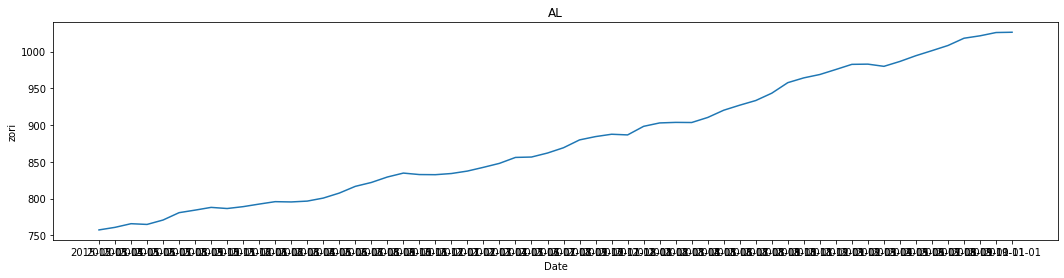

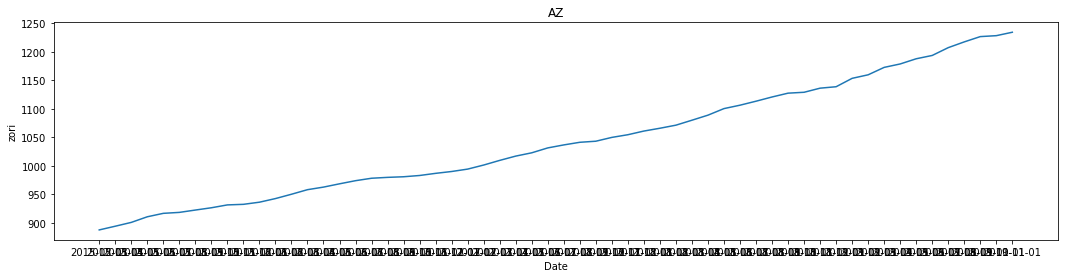

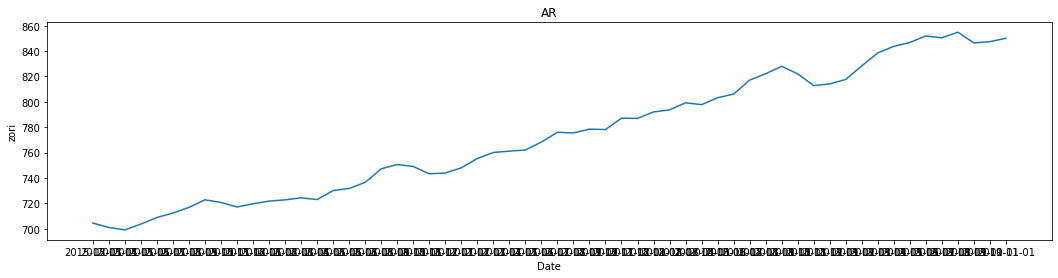

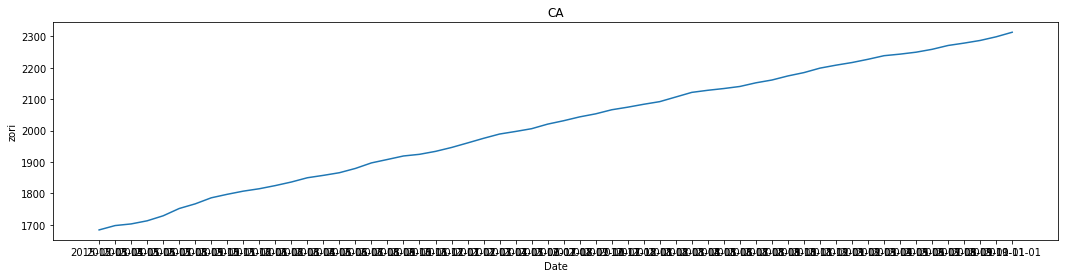

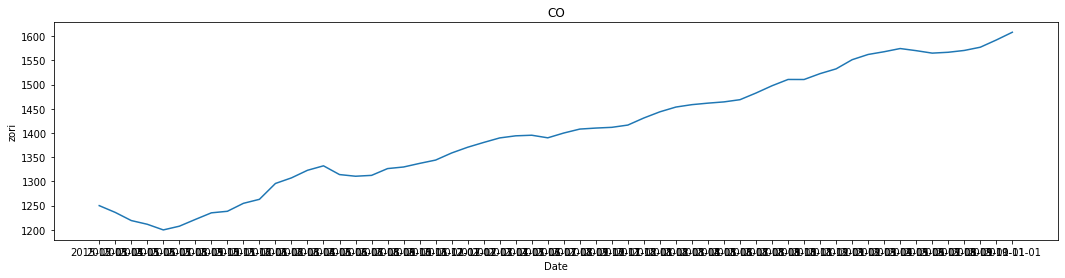

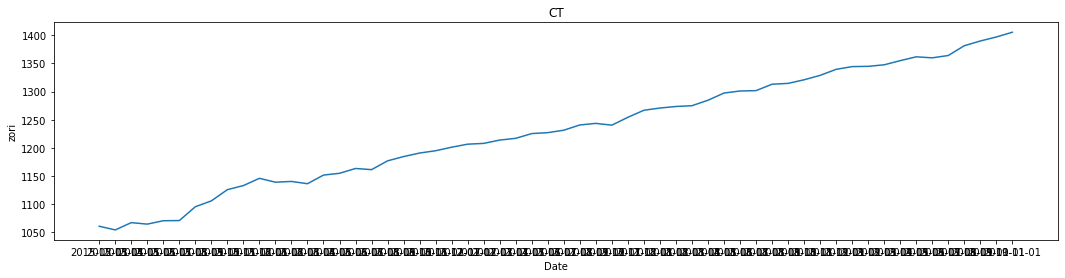

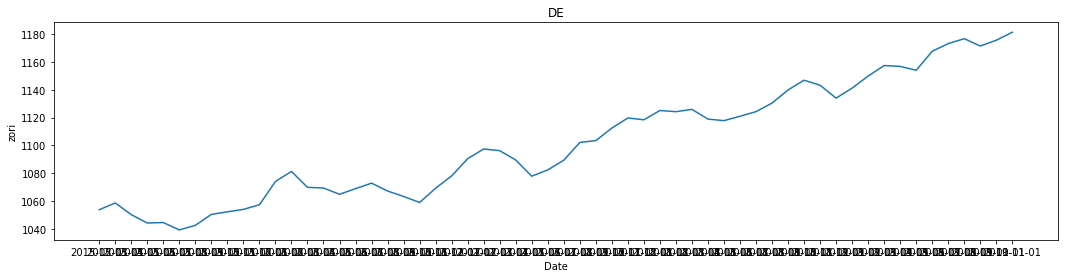

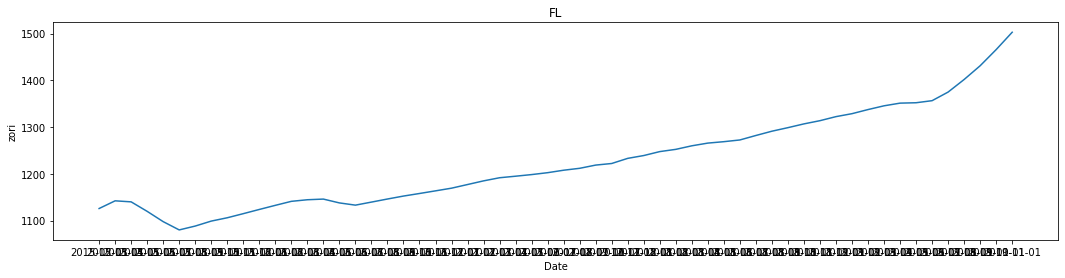

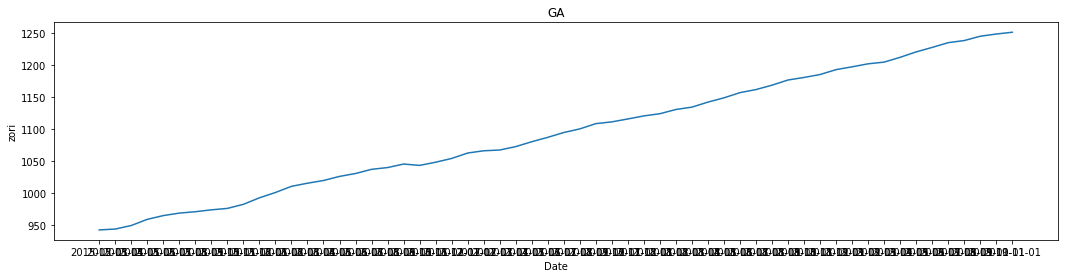

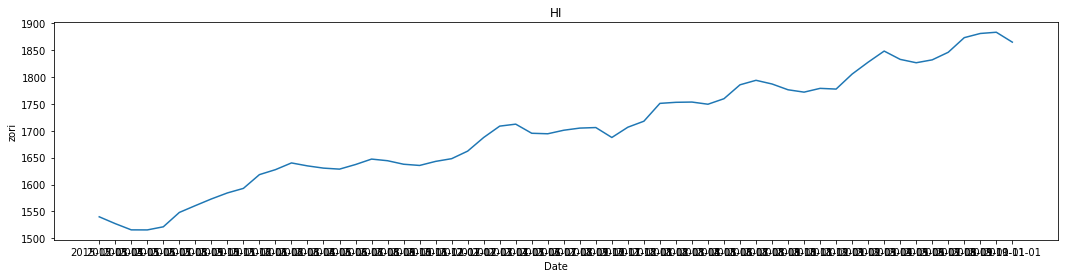

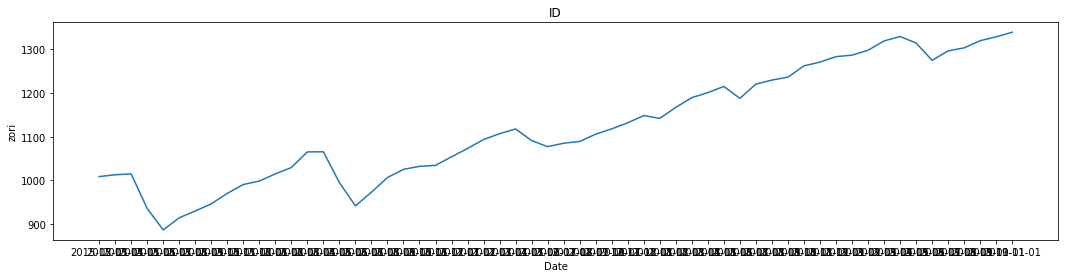

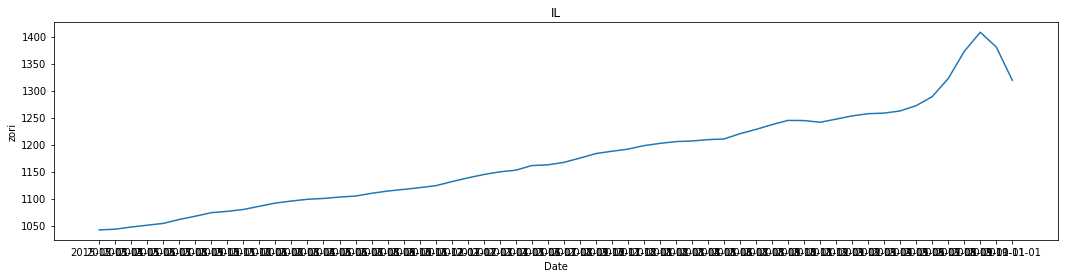

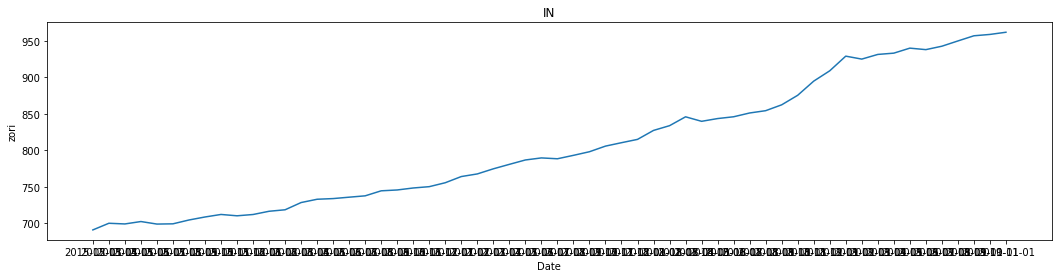

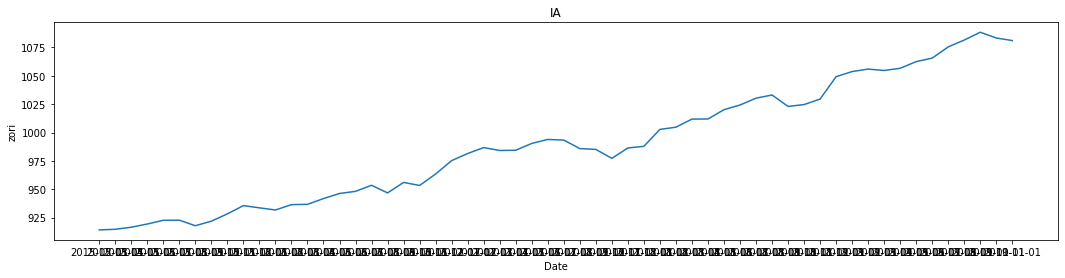

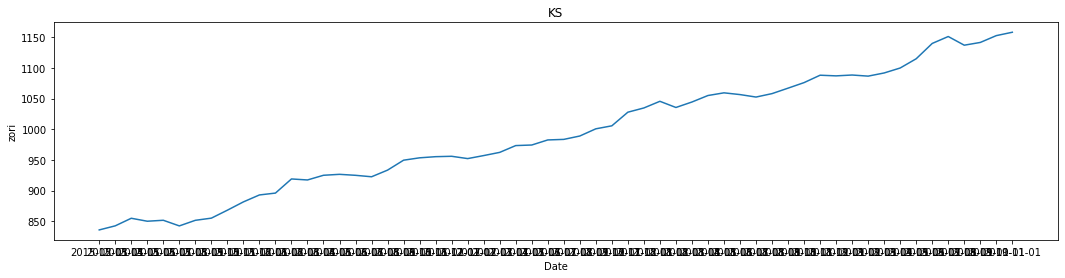

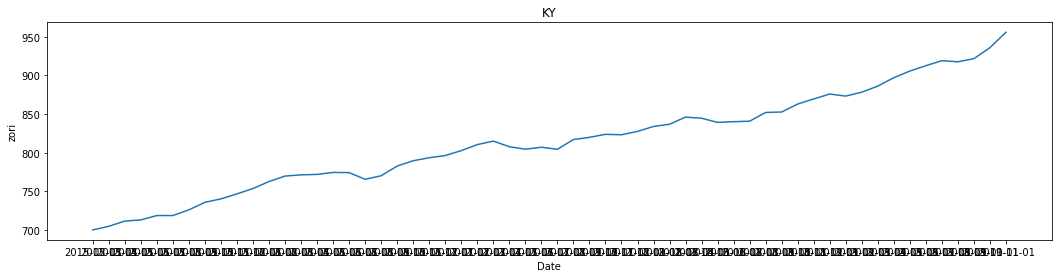

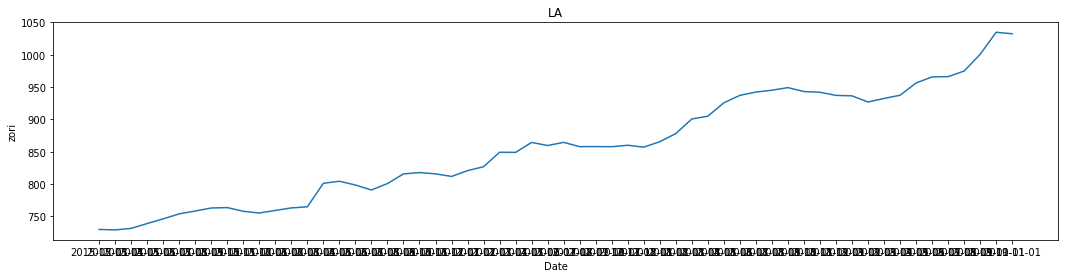

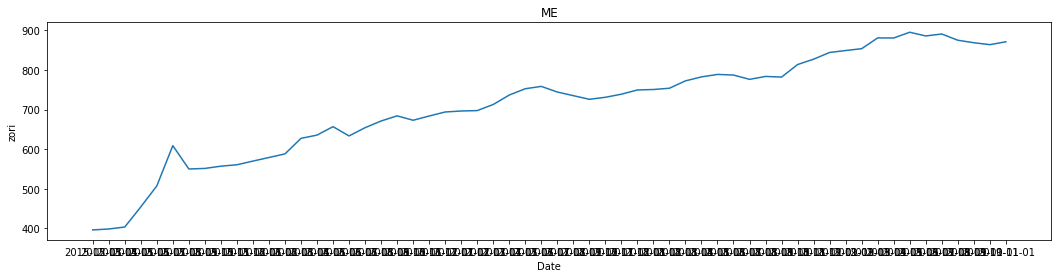

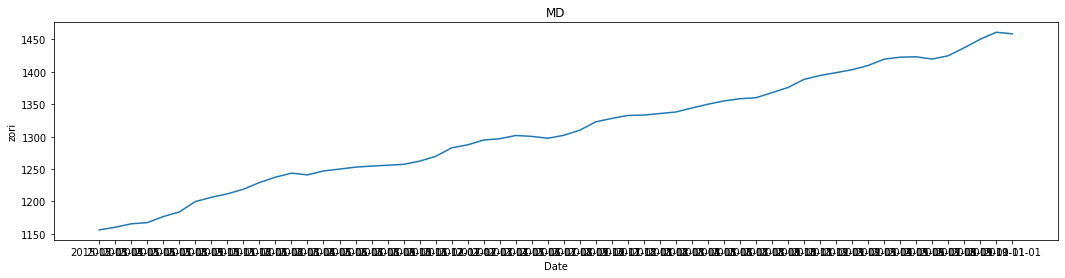

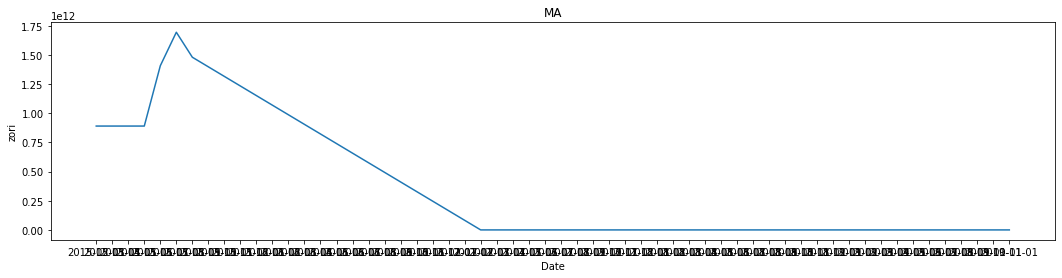

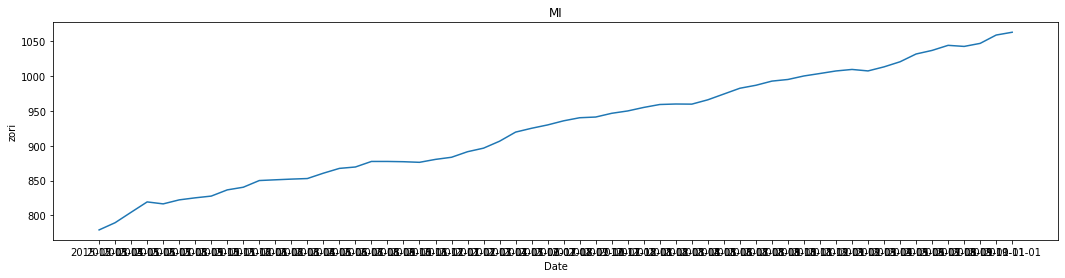

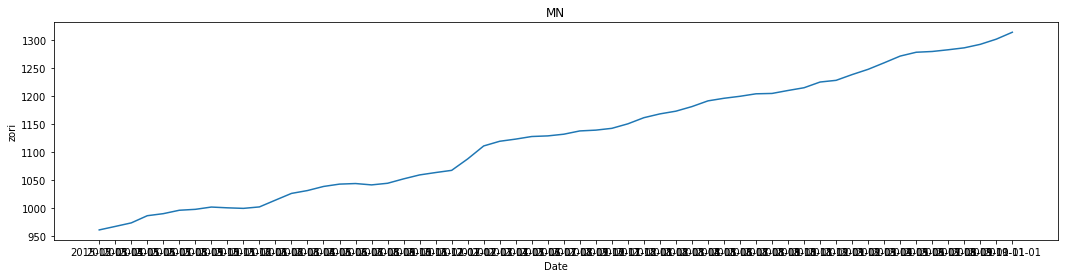

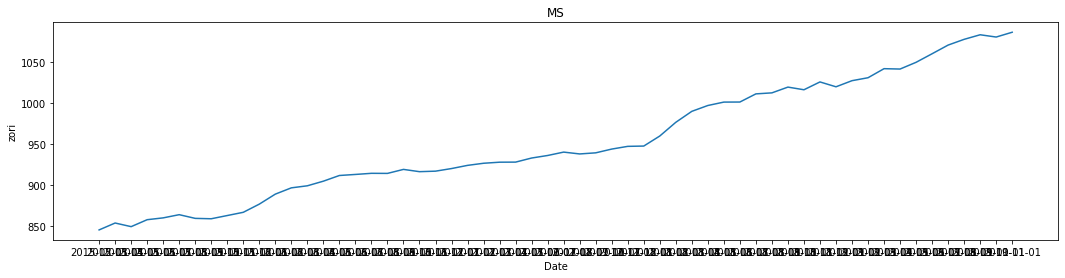

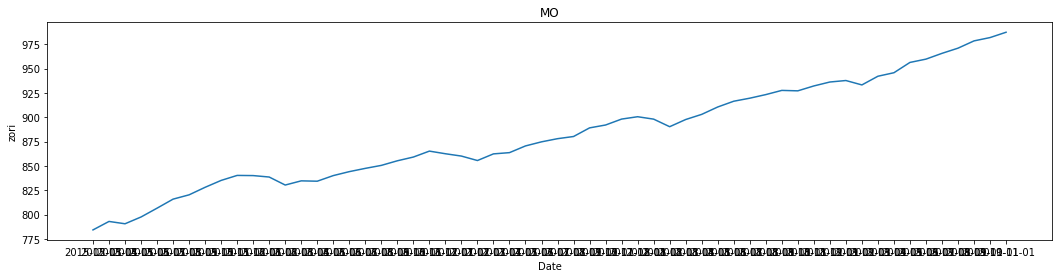

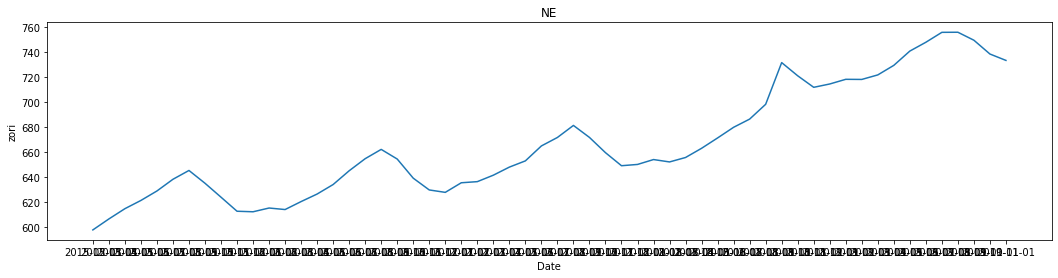

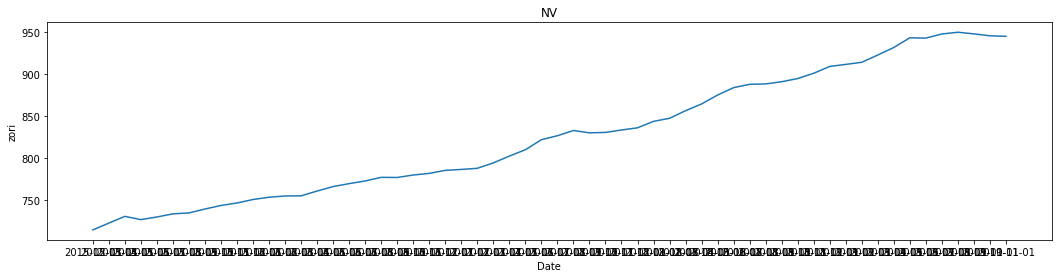

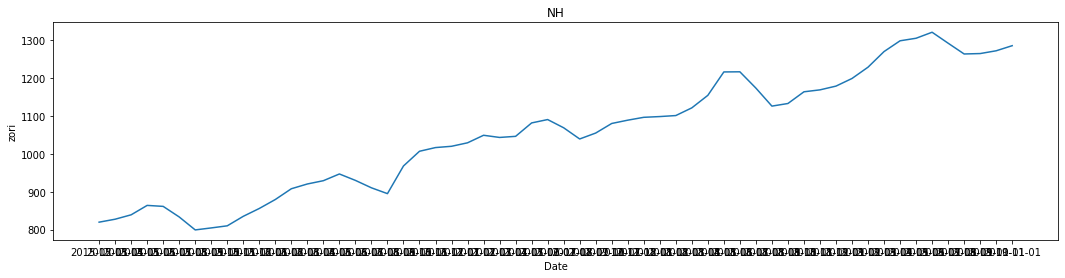

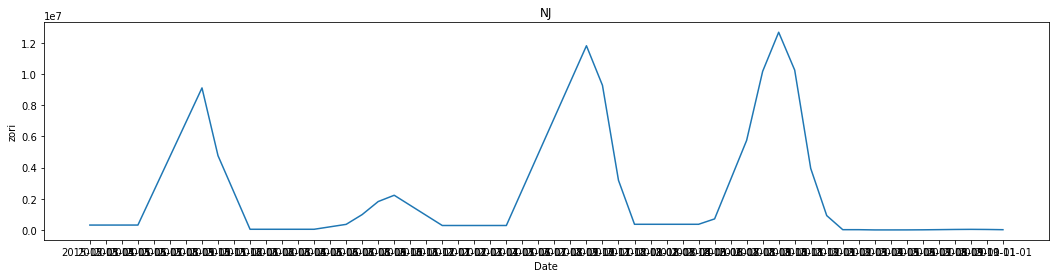

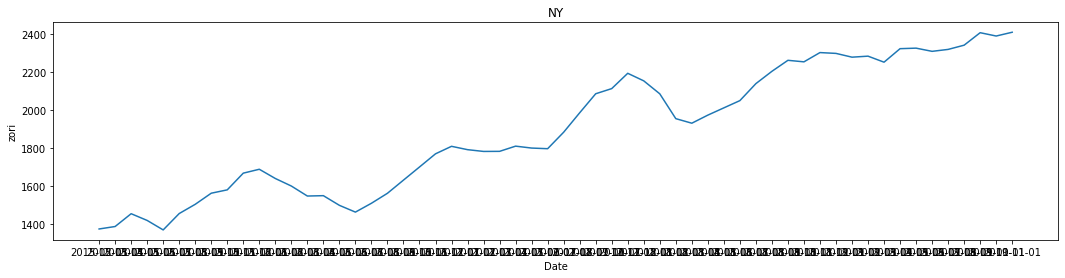

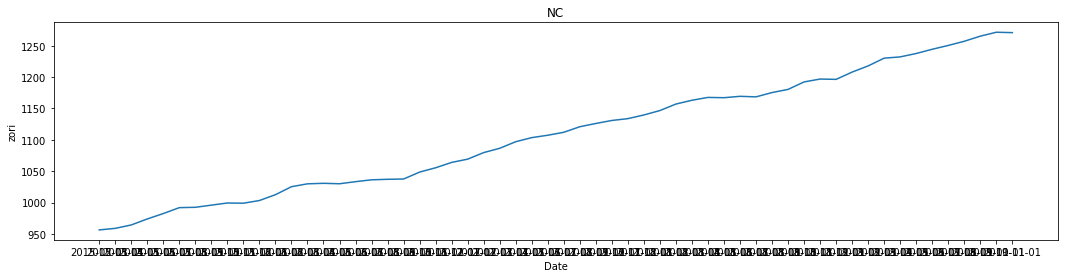

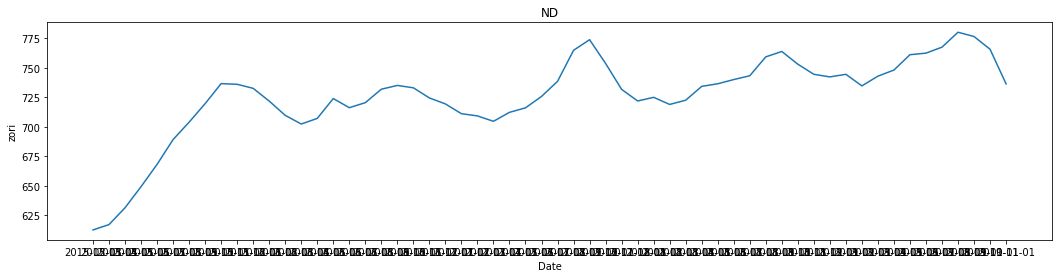

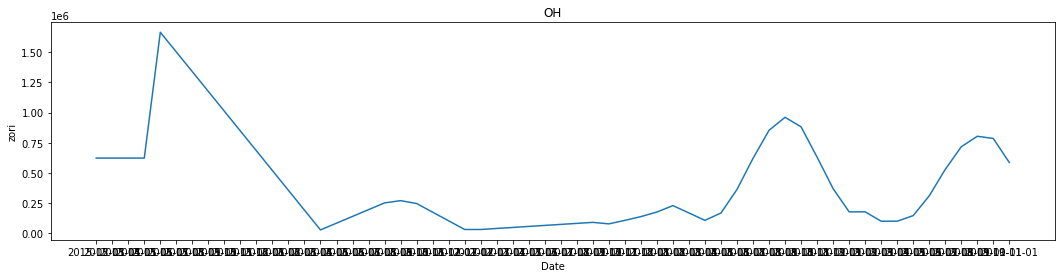

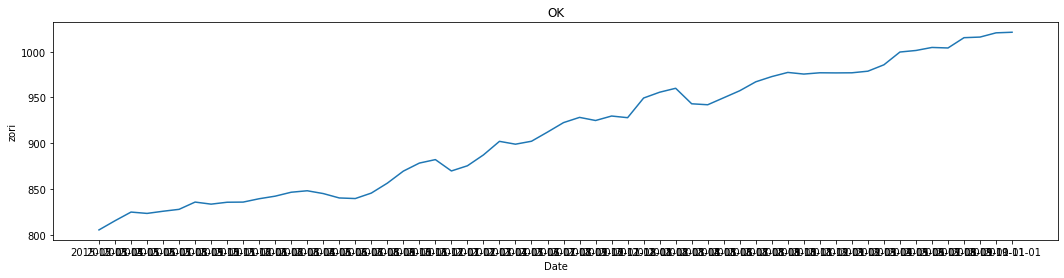

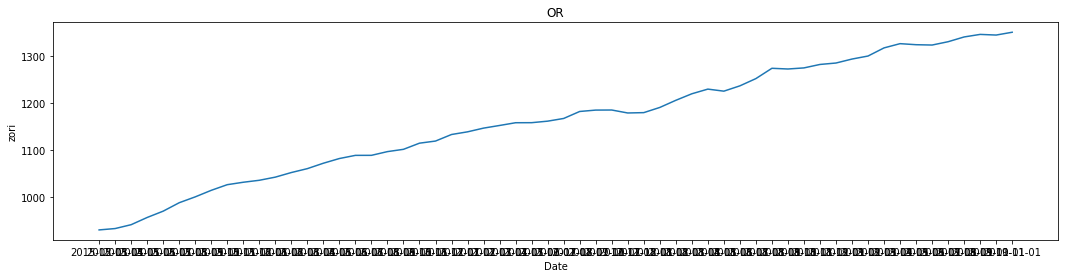

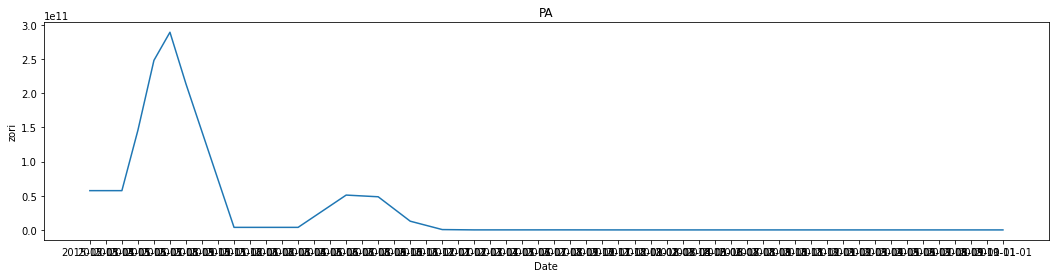

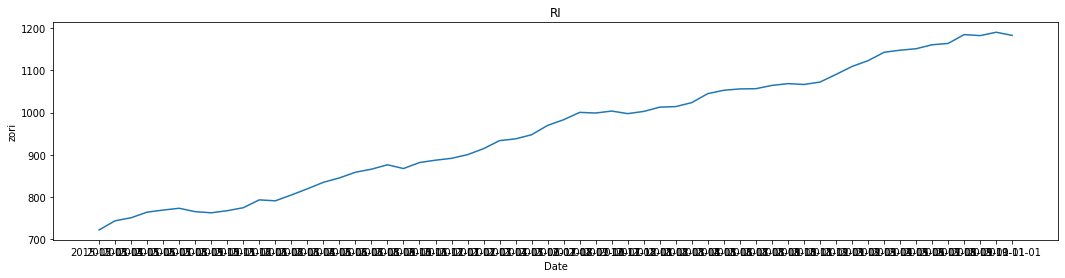

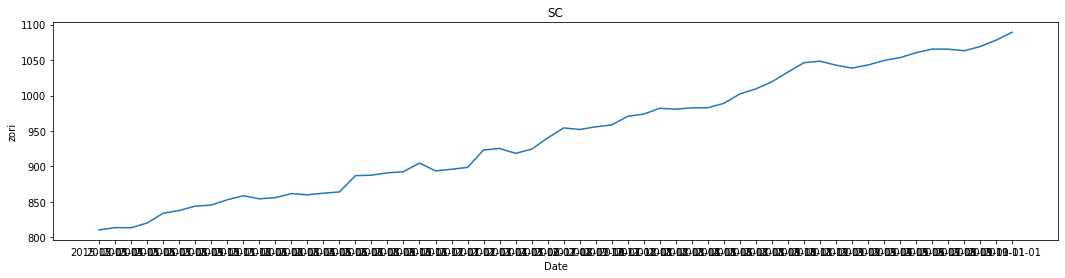

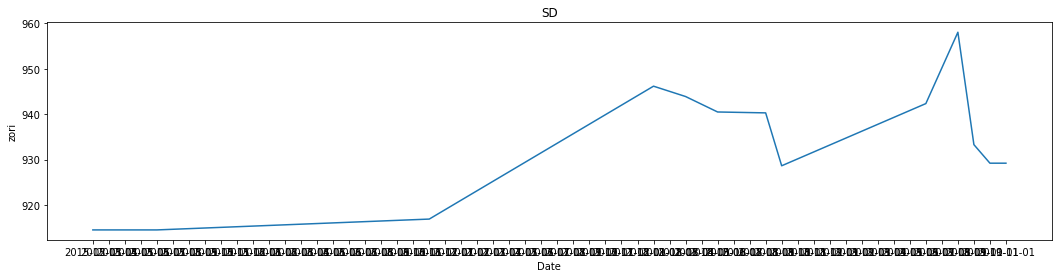

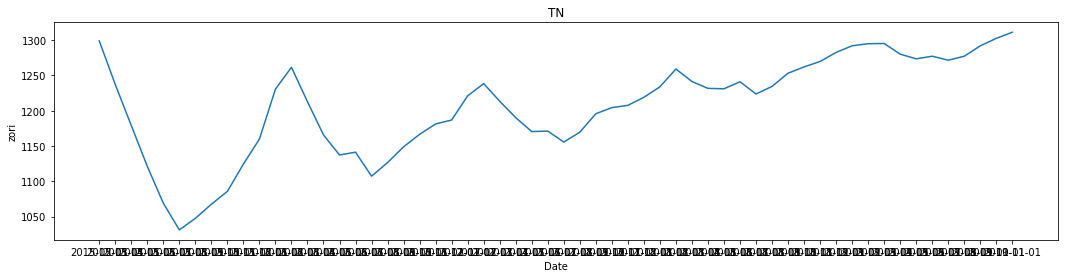

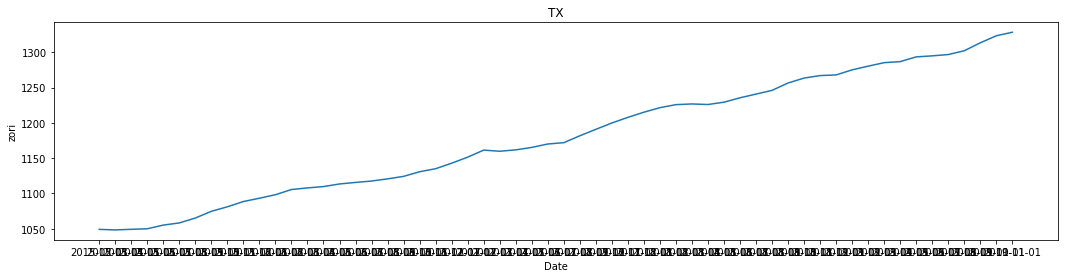

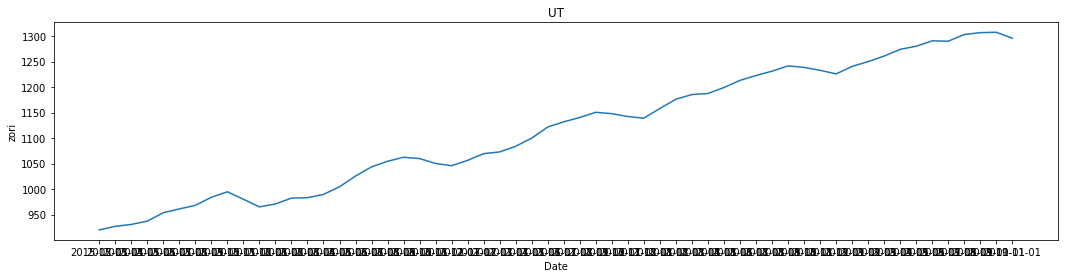

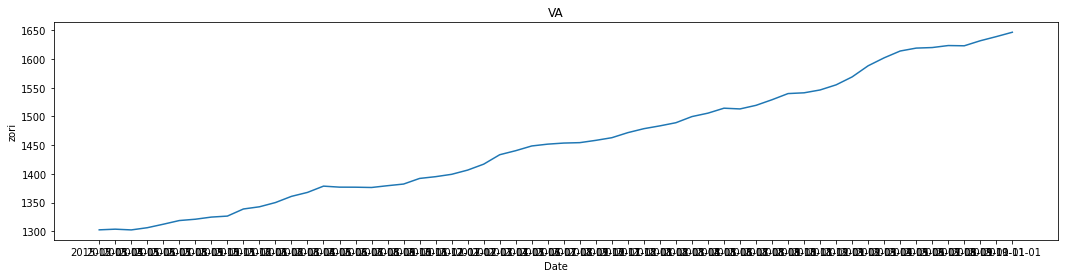

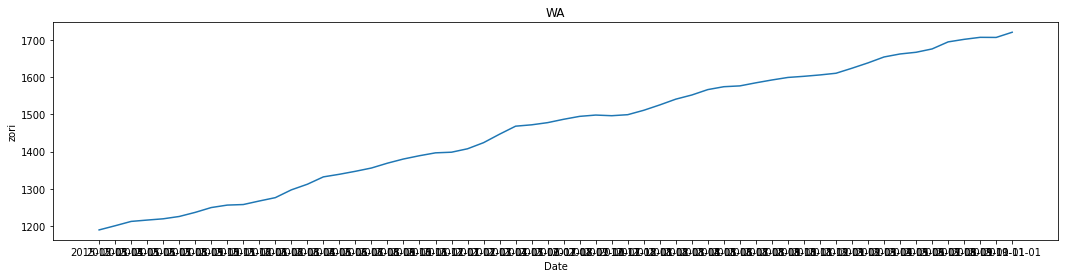

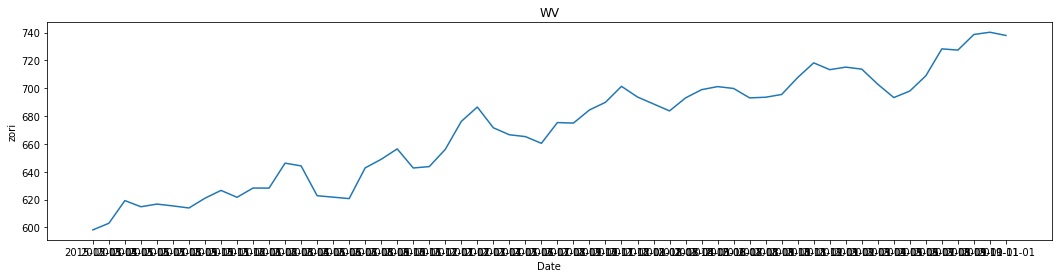

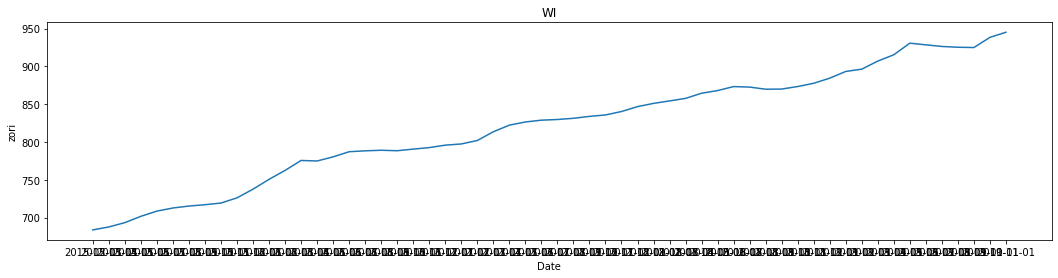

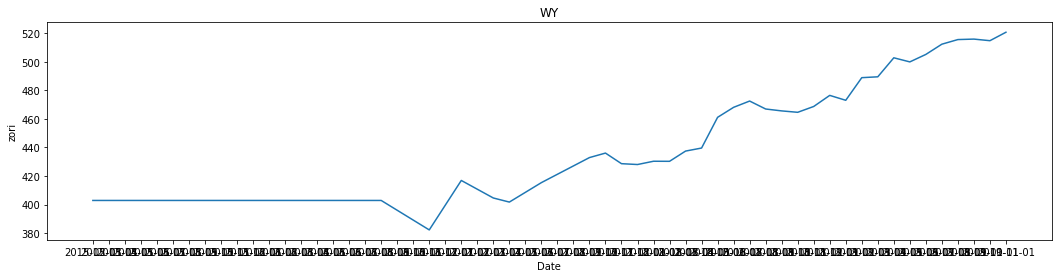

In [63]:
state_abbrs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
no_data = []
for state in state_abbrs:
    state_data = data[data['State'] == state]
    if (data[data['State'] == state].empty):
        no_data.append(state)
        continue;
    # sns.pairplot(Zori_indicators, diag_kind = 'kde')
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.plot(state_data['Date'], state_data['zori'])

    ax.set(xlabel="Date",
           ylabel="zori",
           title= state)
    plt.show()
    


## Plot the interaction between Zori and selected indicators

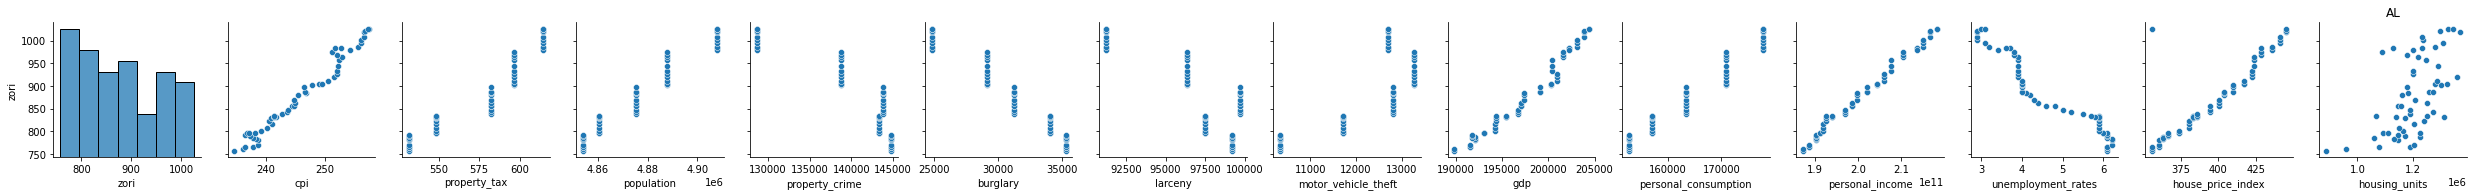

<Figure size 576x576 with 0 Axes>

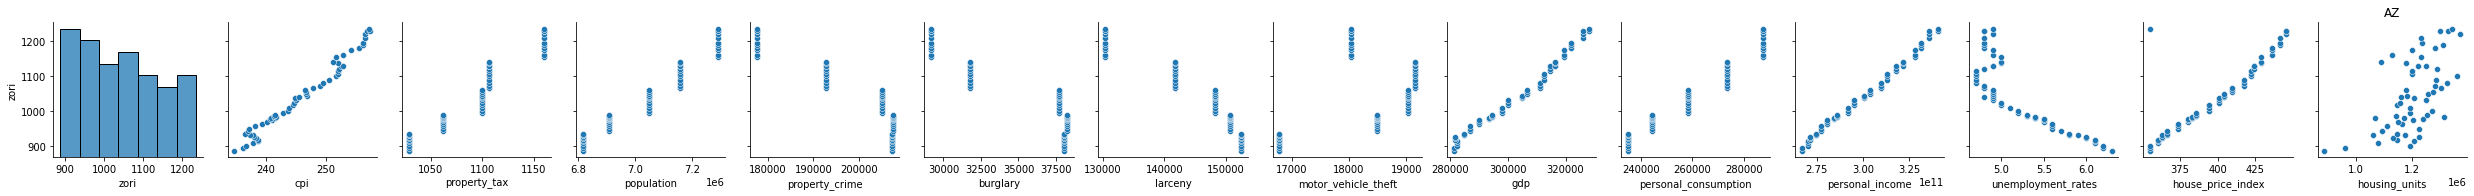

<Figure size 576x576 with 0 Axes>

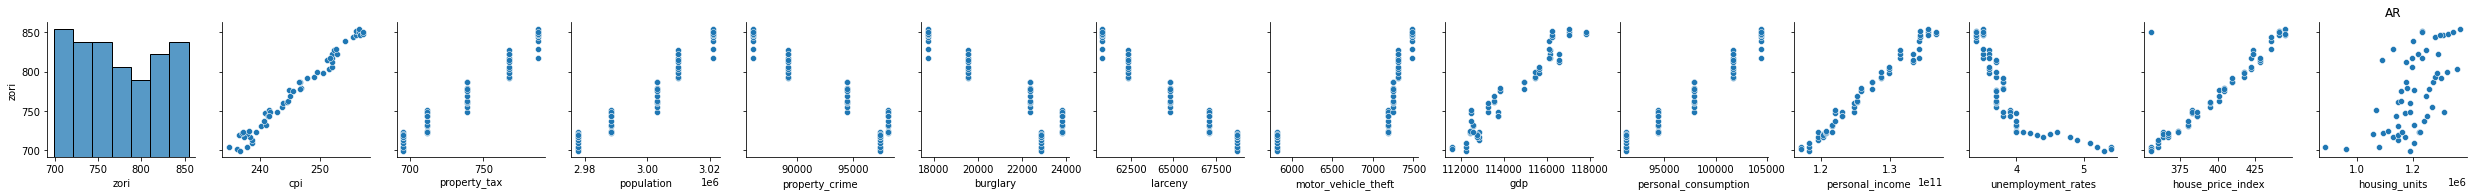

<Figure size 576x576 with 0 Axes>

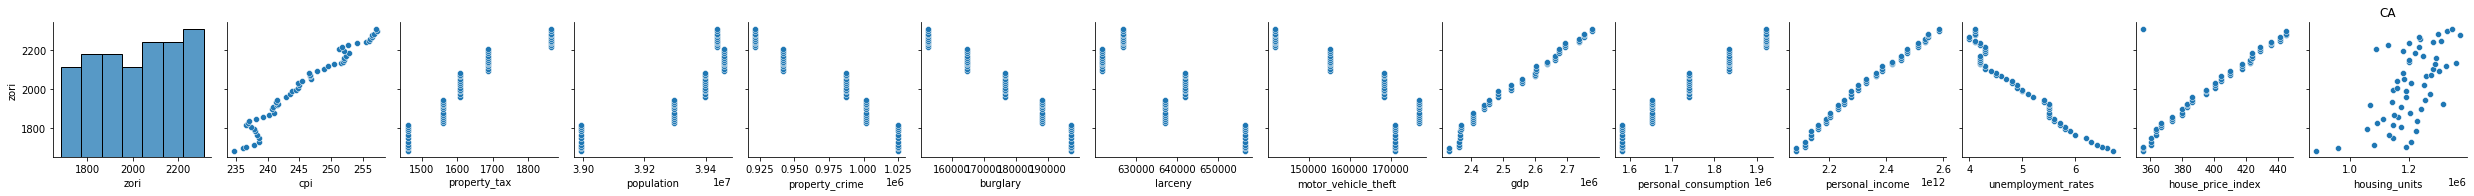

<Figure size 576x576 with 0 Axes>

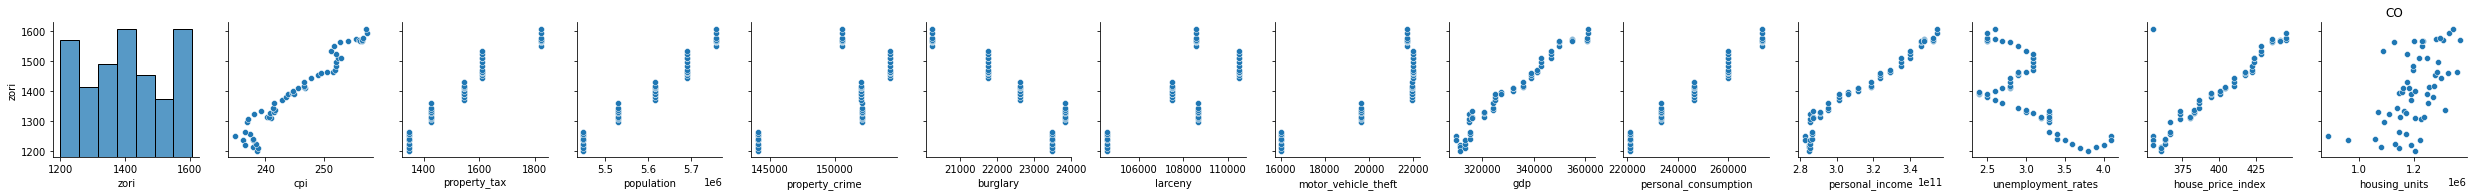

<Figure size 576x576 with 0 Axes>

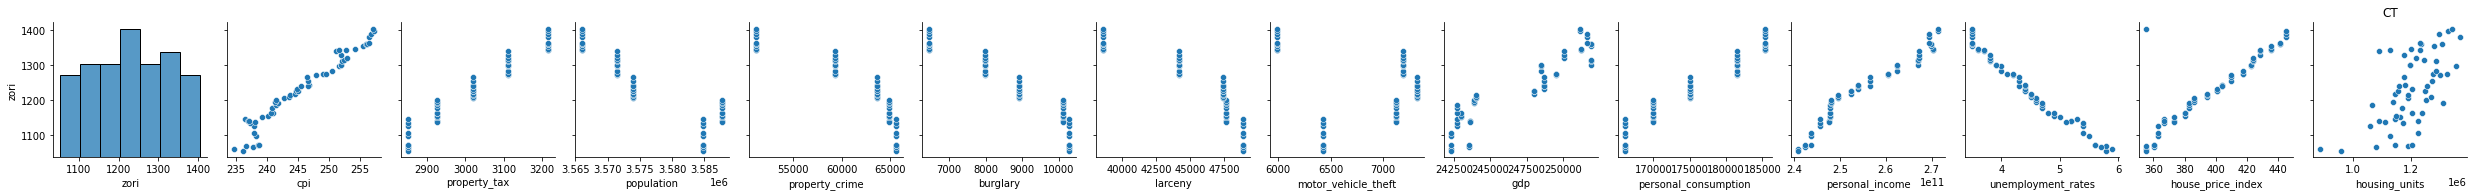

<Figure size 576x576 with 0 Axes>

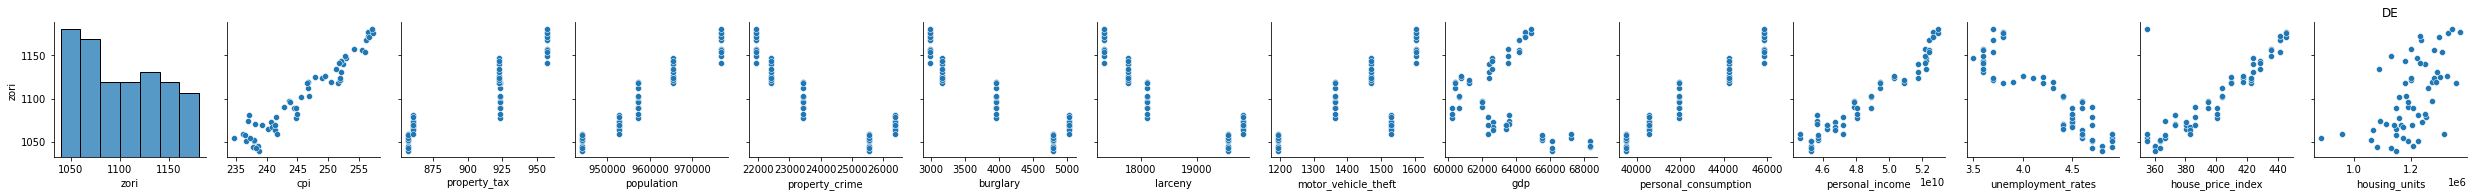

<Figure size 576x576 with 0 Axes>

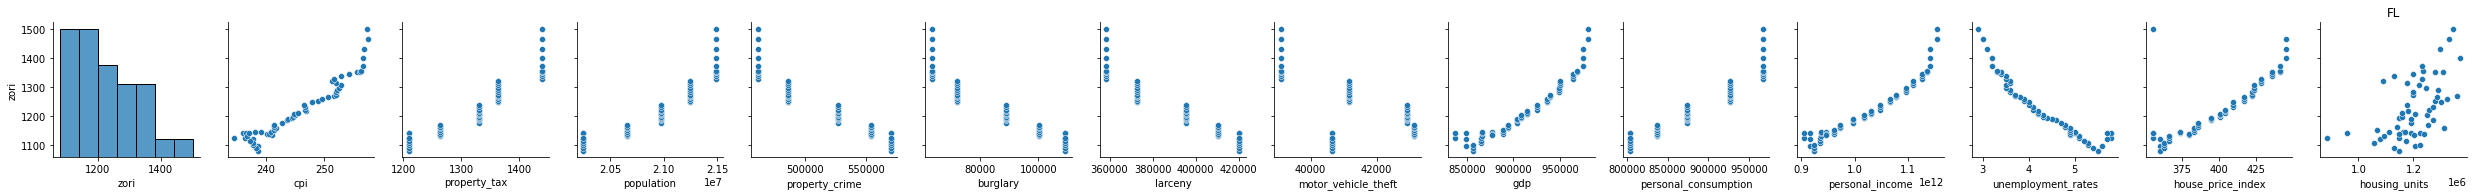

<Figure size 576x576 with 0 Axes>

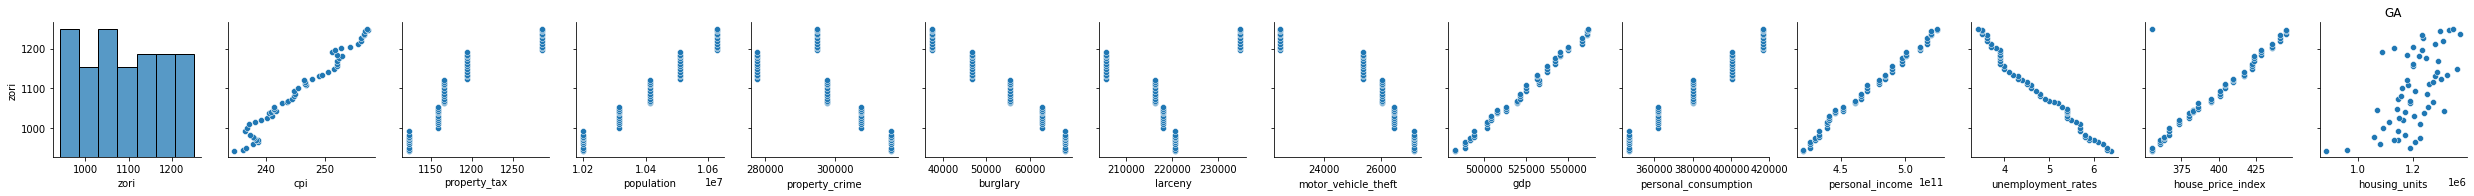

<Figure size 576x576 with 0 Axes>

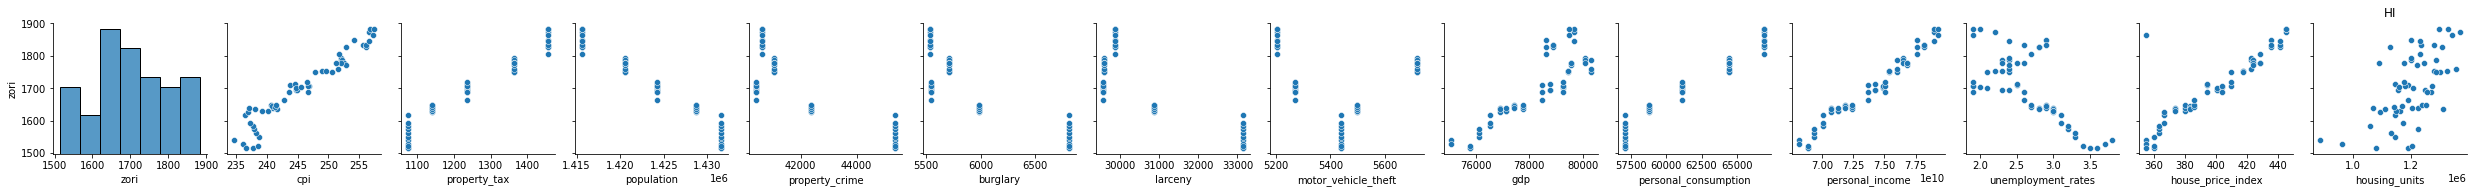

<Figure size 576x576 with 0 Axes>

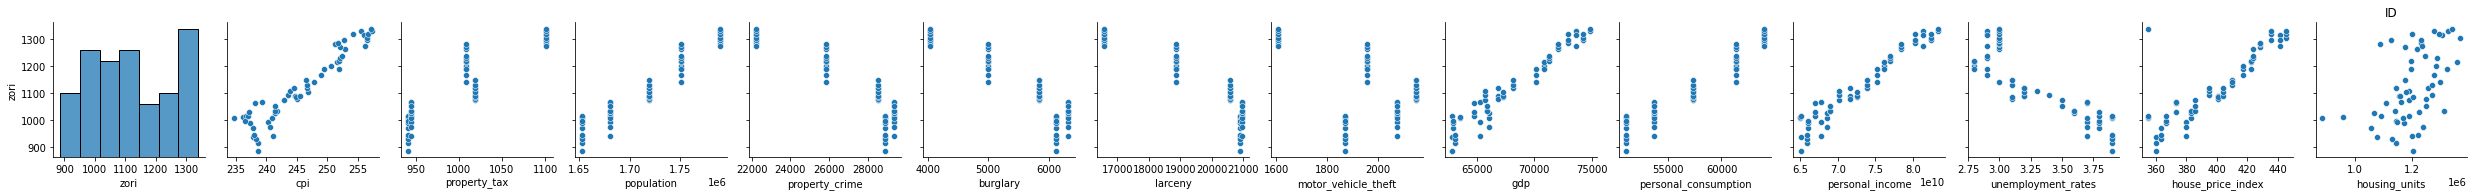

<Figure size 576x576 with 0 Axes>

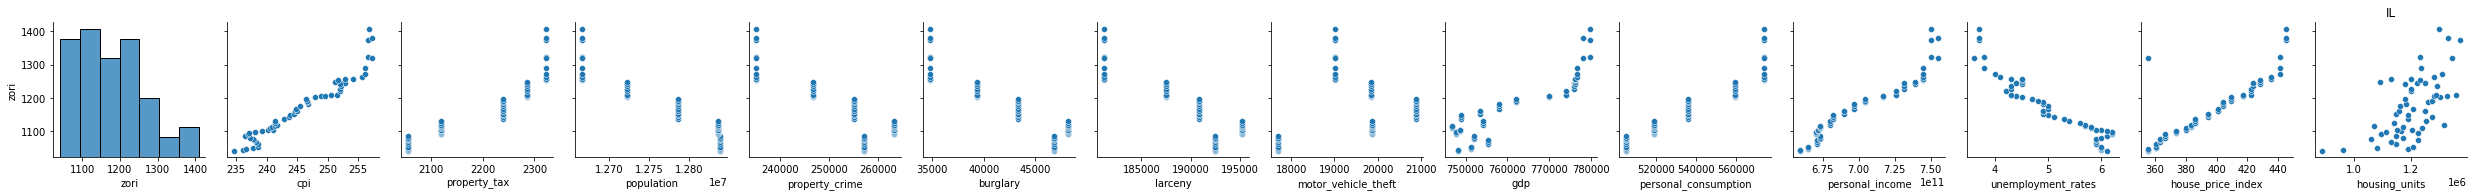

<Figure size 576x576 with 0 Axes>

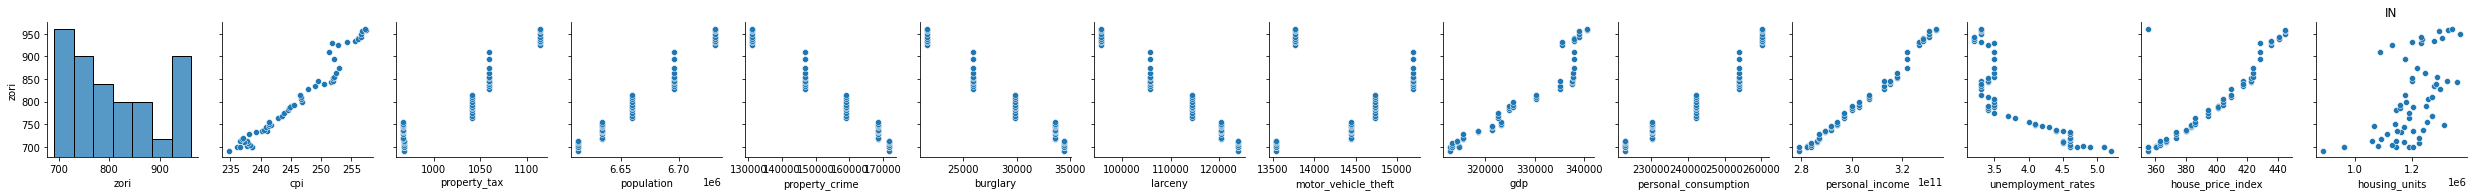

<Figure size 576x576 with 0 Axes>

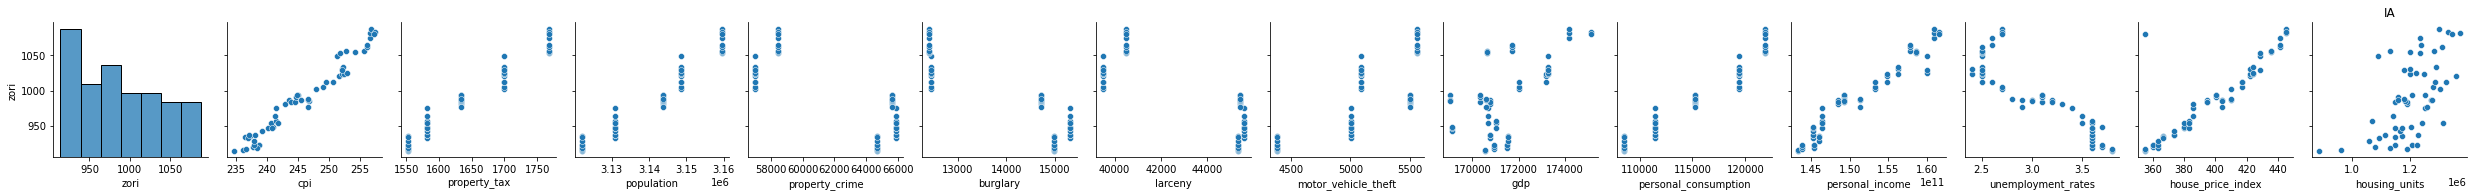

<Figure size 576x576 with 0 Axes>

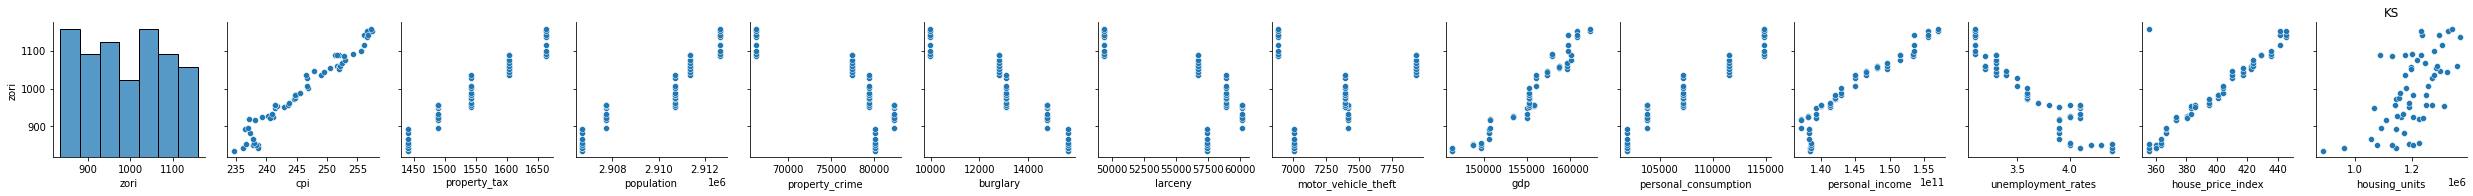

<Figure size 576x576 with 0 Axes>

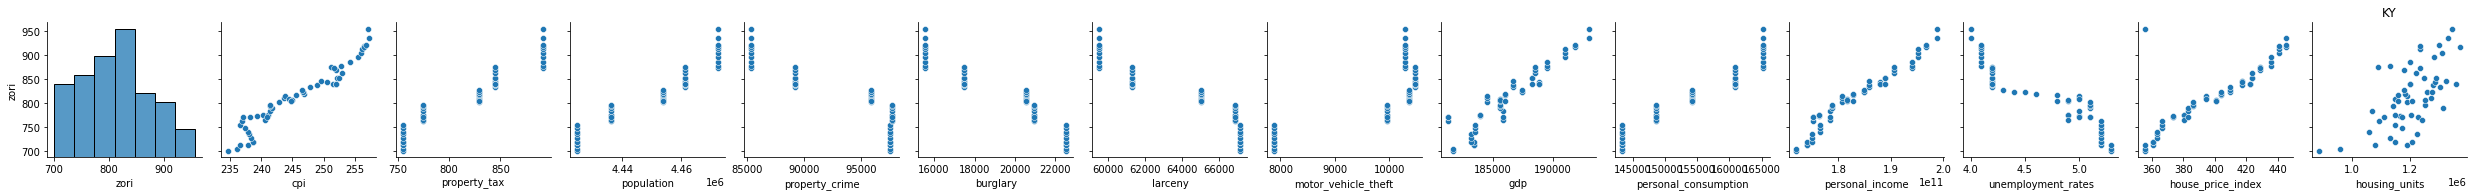

<Figure size 576x576 with 0 Axes>

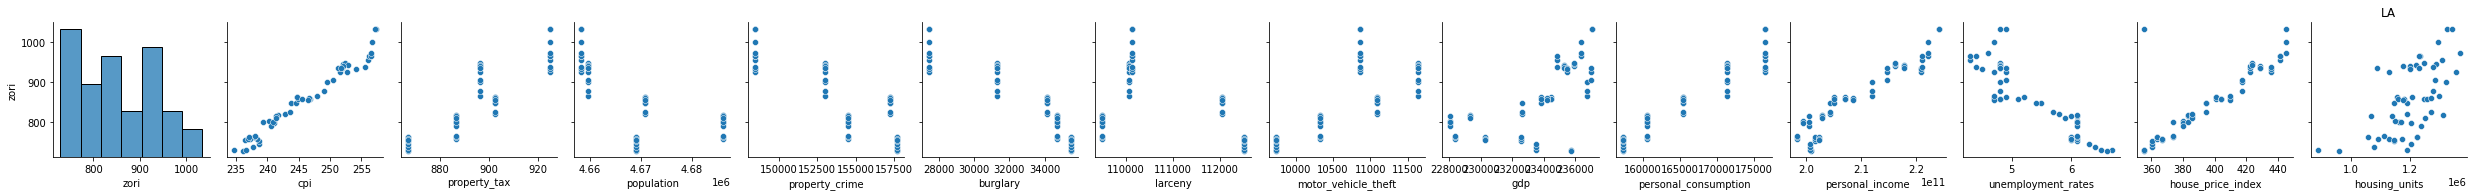

<Figure size 576x576 with 0 Axes>

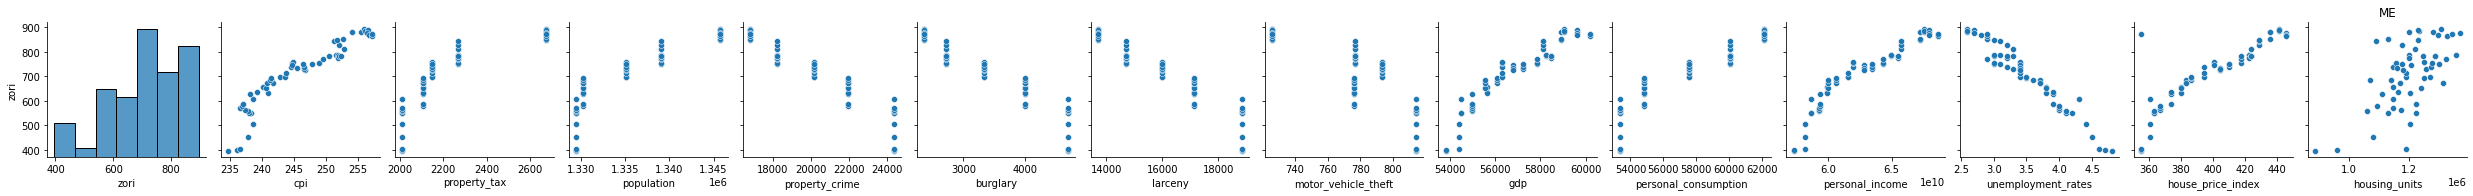

<Figure size 576x576 with 0 Axes>

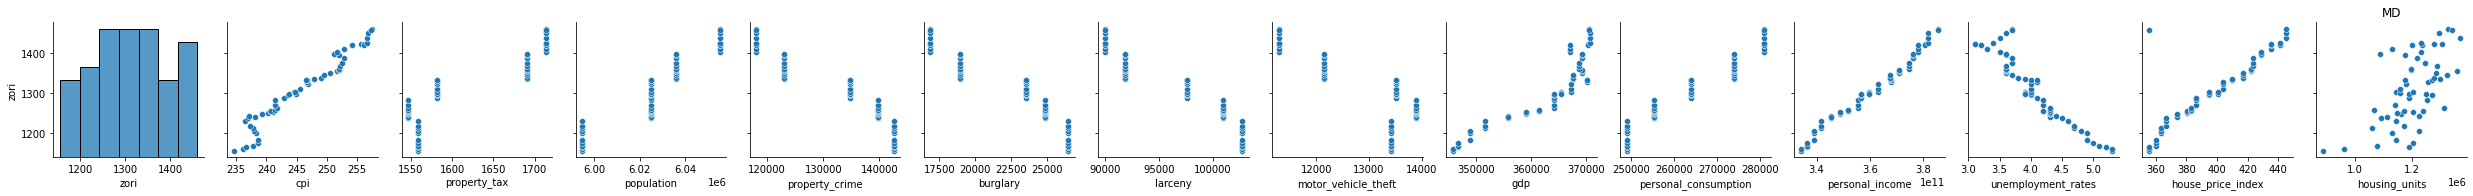

<Figure size 576x576 with 0 Axes>

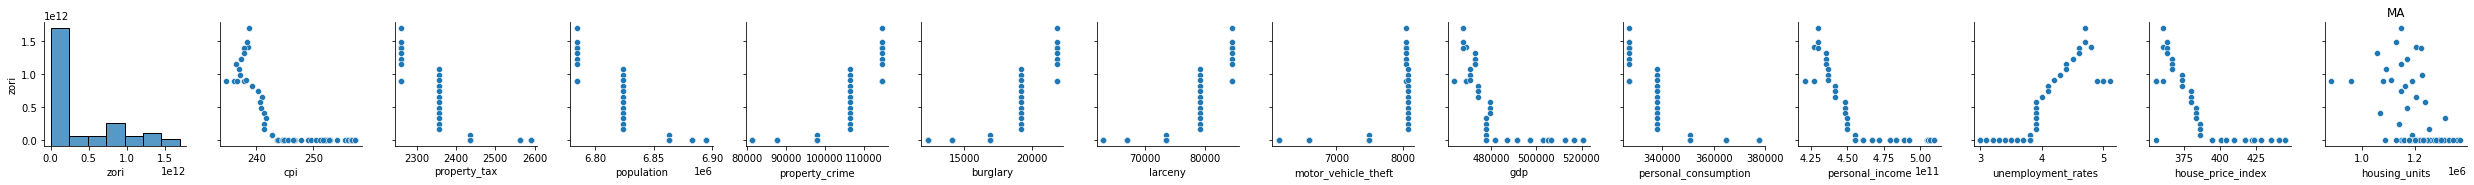

<Figure size 576x576 with 0 Axes>

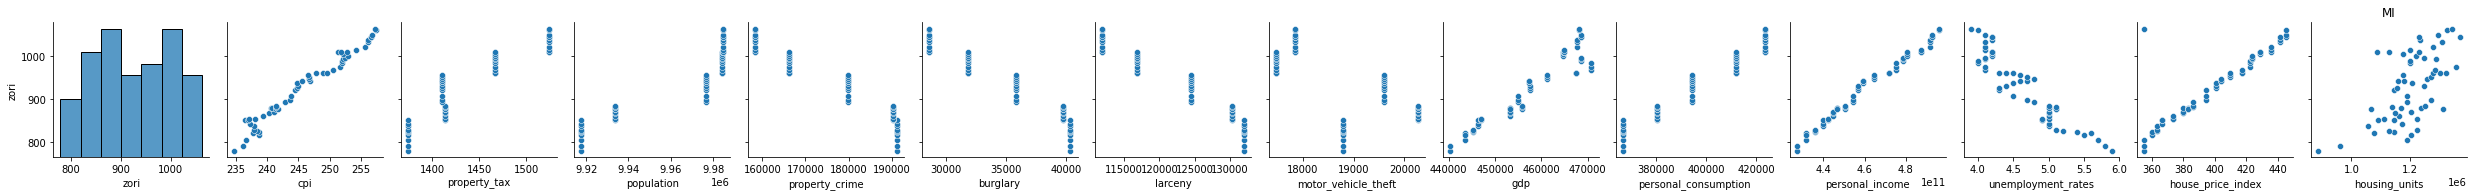

<Figure size 576x576 with 0 Axes>

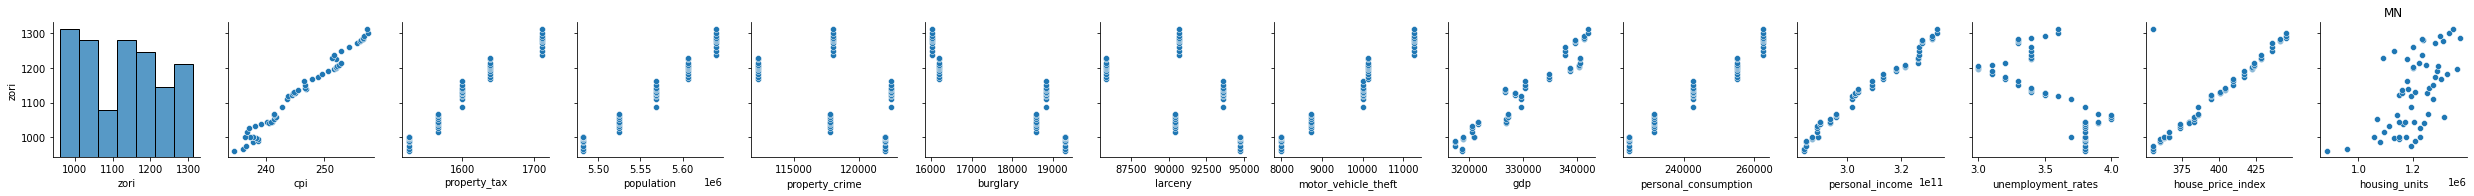

<Figure size 576x576 with 0 Axes>

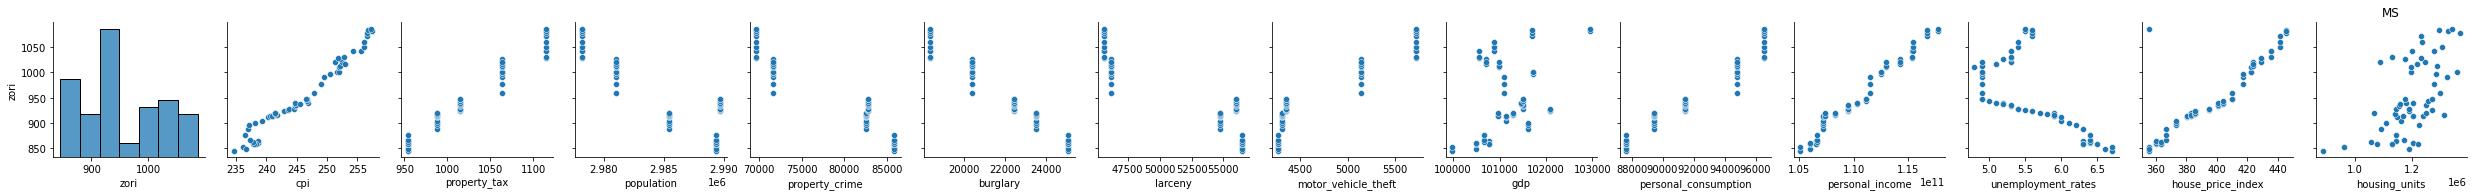

<Figure size 576x576 with 0 Axes>

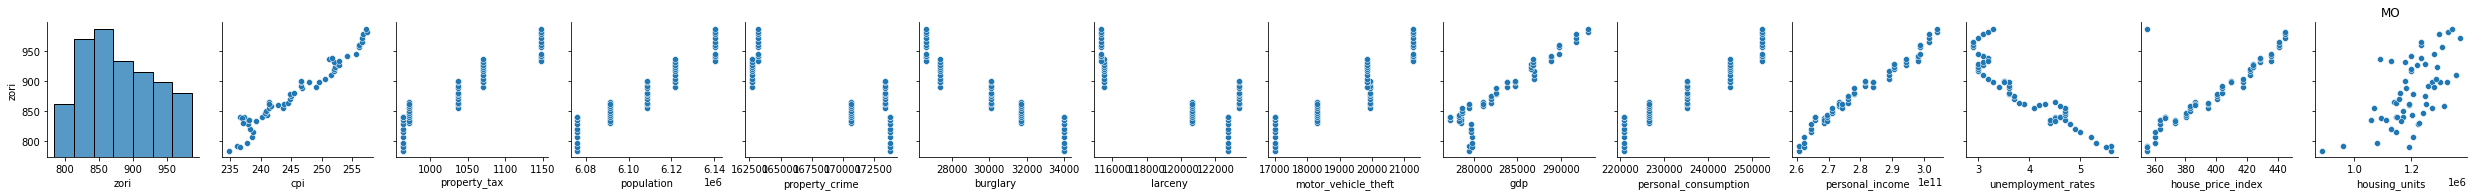

<Figure size 576x576 with 0 Axes>

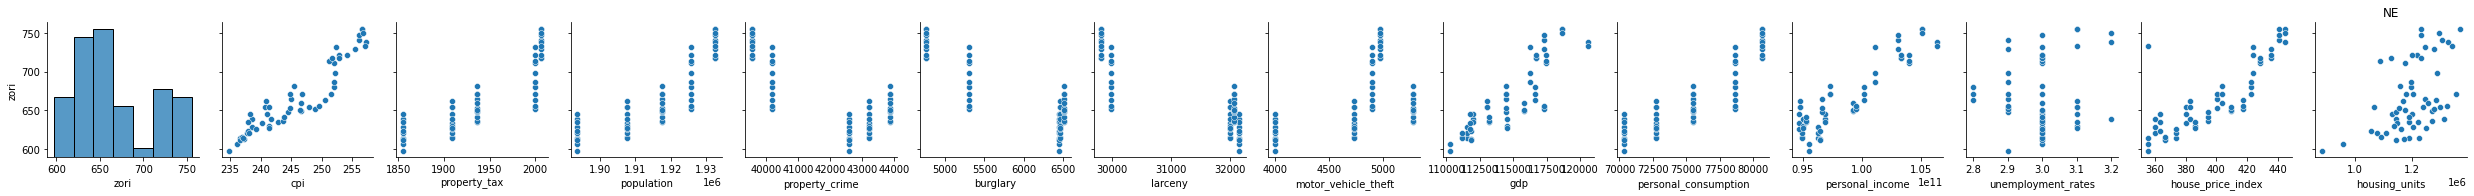

<Figure size 576x576 with 0 Axes>

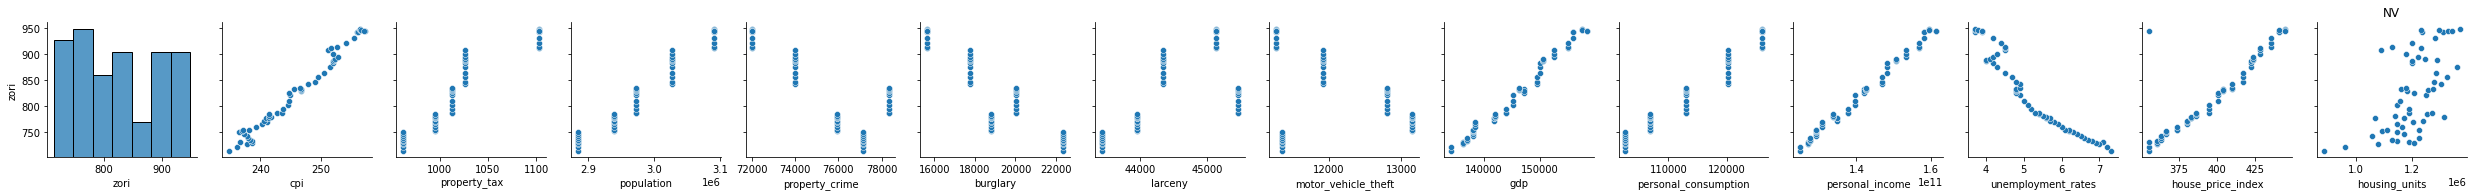

<Figure size 576x576 with 0 Axes>

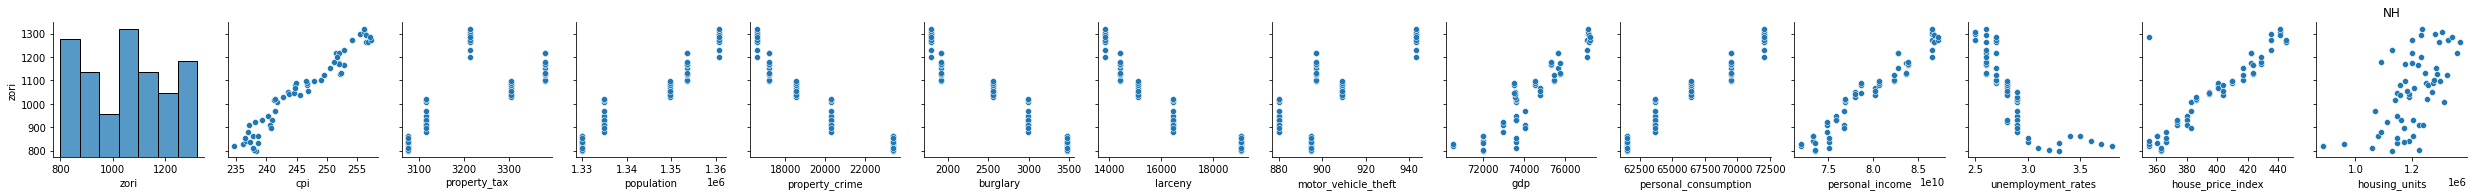

<Figure size 576x576 with 0 Axes>

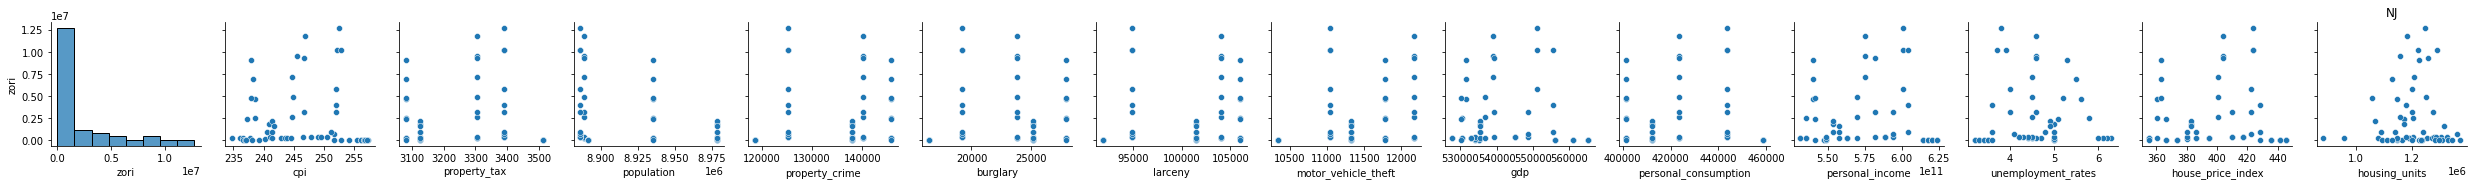

<Figure size 576x576 with 0 Axes>

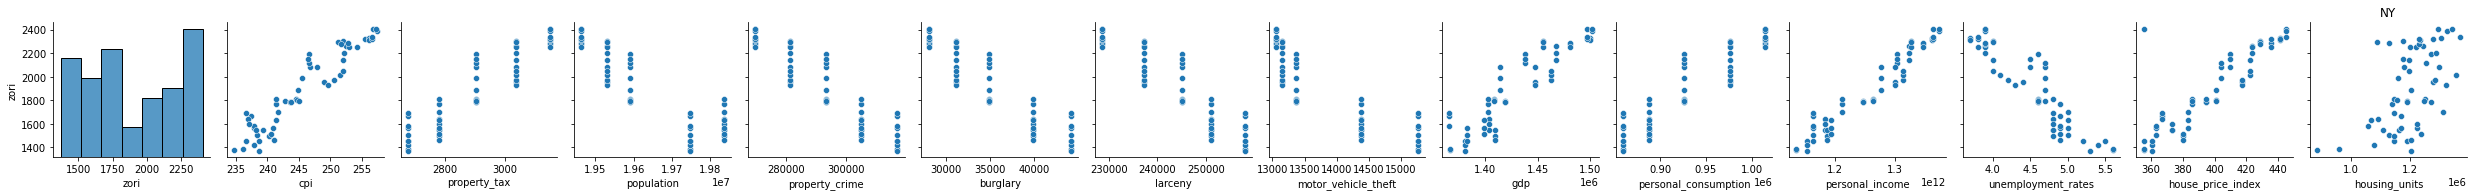

<Figure size 576x576 with 0 Axes>

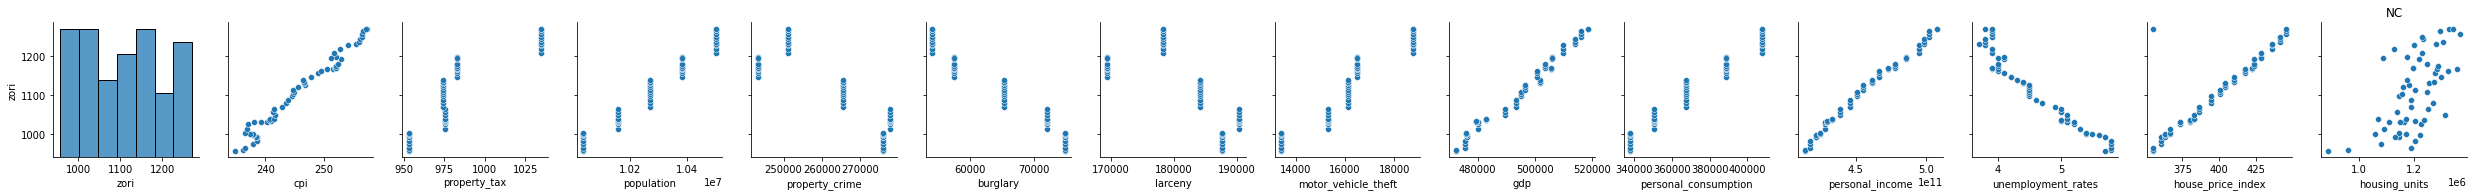

<Figure size 576x576 with 0 Axes>

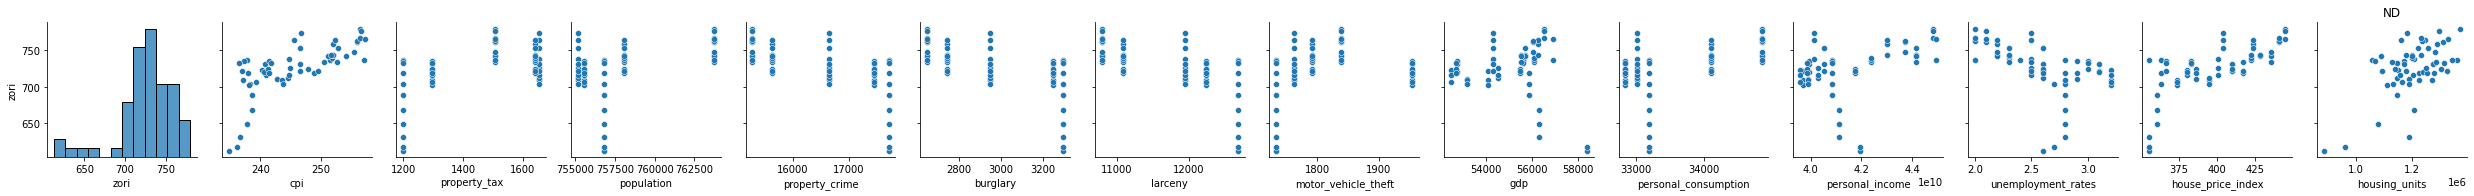

<Figure size 576x576 with 0 Axes>

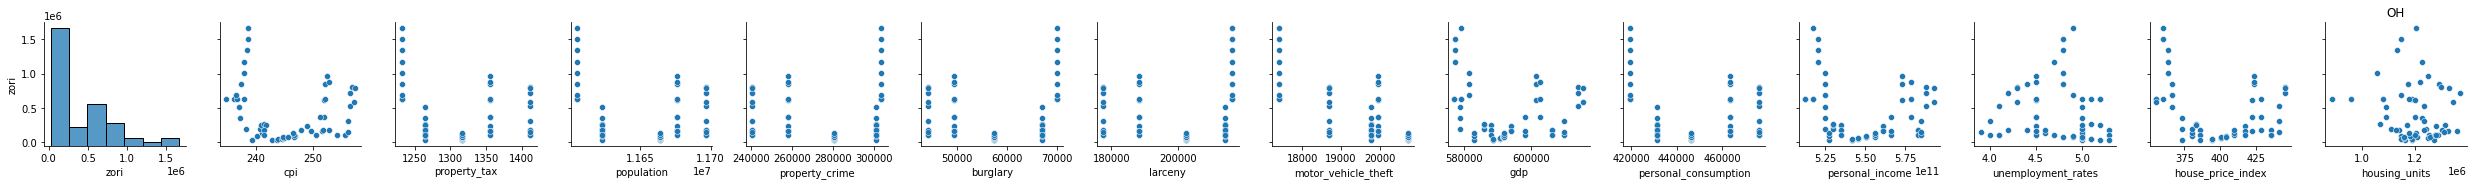

<Figure size 576x576 with 0 Axes>

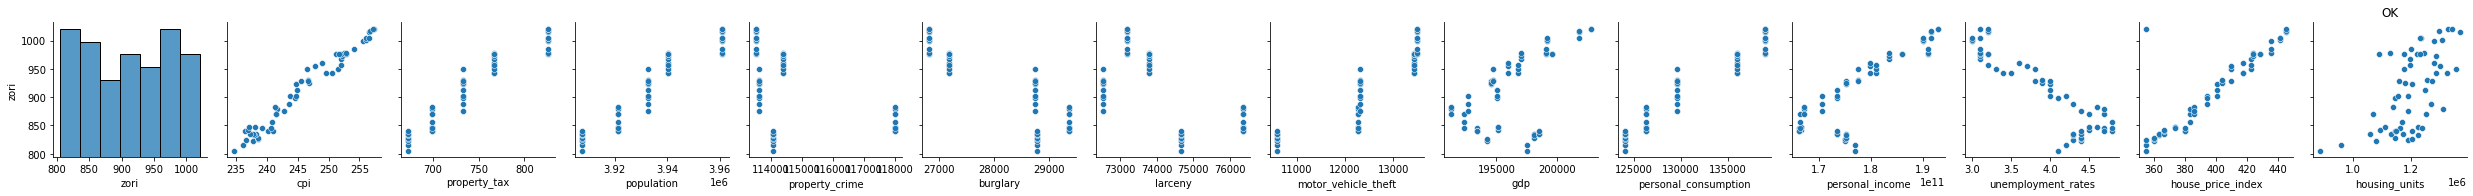

<Figure size 576x576 with 0 Axes>

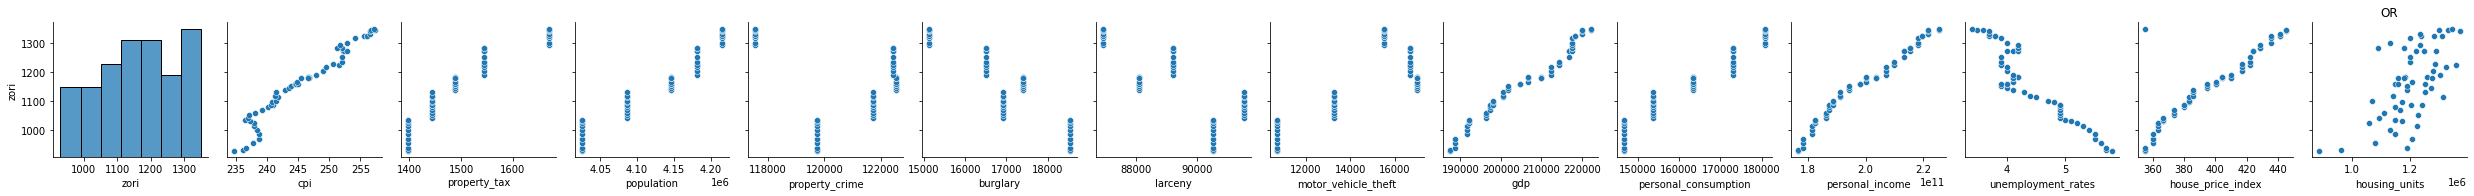

<Figure size 576x576 with 0 Axes>

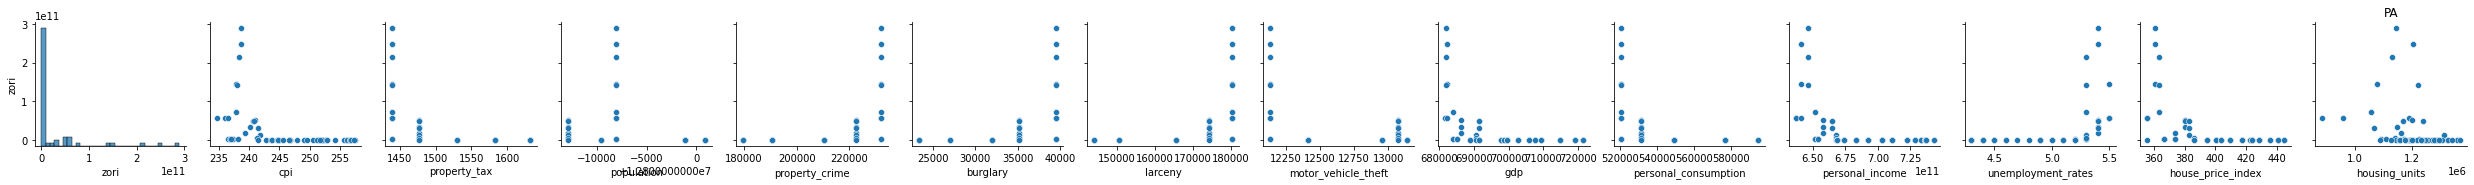

<Figure size 576x576 with 0 Axes>

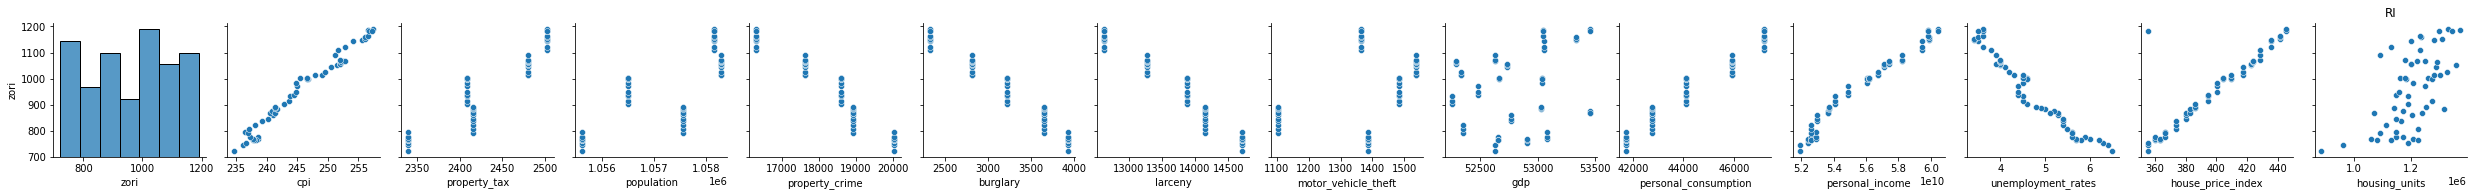

<Figure size 576x576 with 0 Axes>

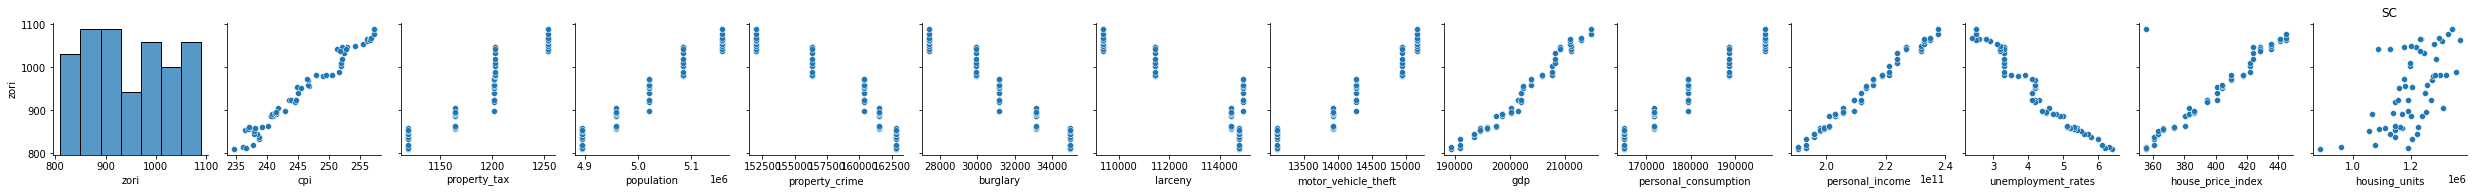

<Figure size 576x576 with 0 Axes>

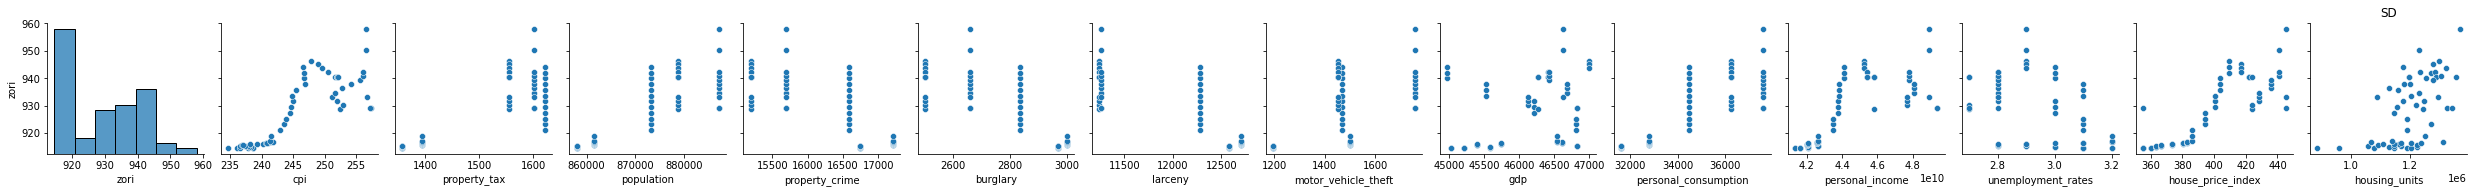

<Figure size 576x576 with 0 Axes>

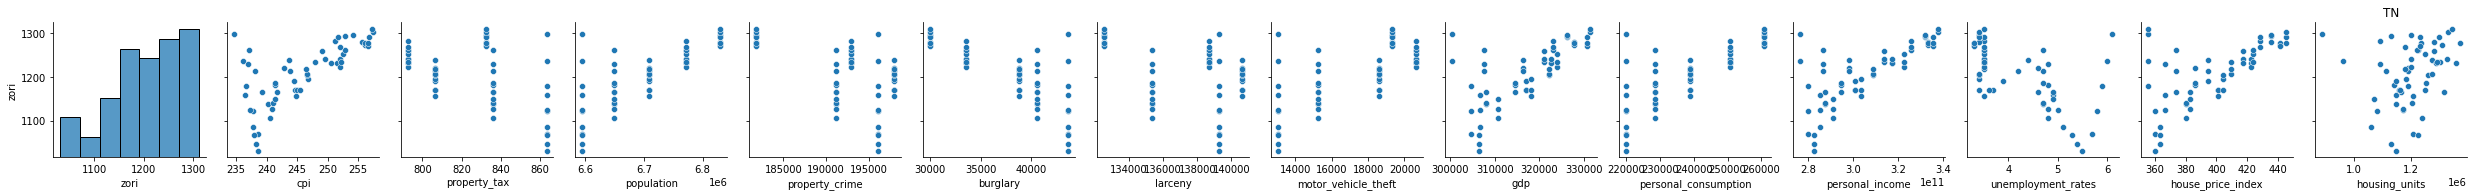

<Figure size 576x576 with 0 Axes>

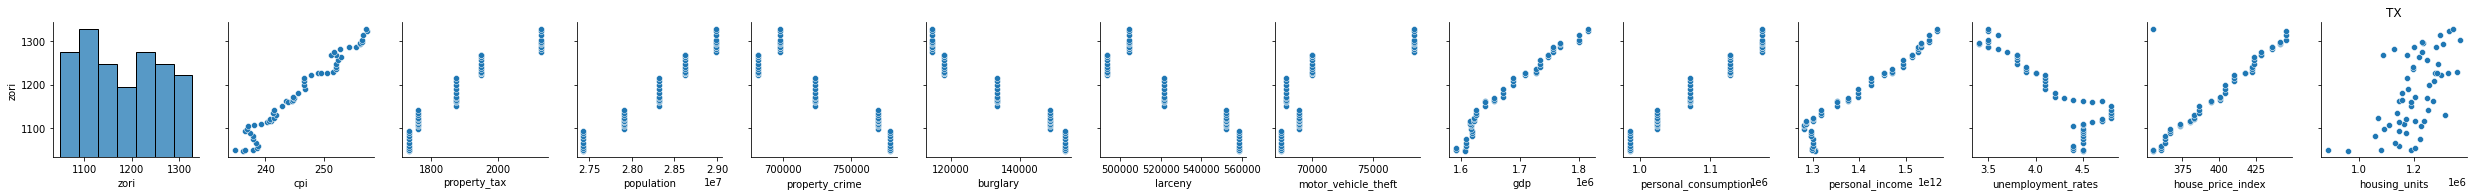

<Figure size 576x576 with 0 Axes>

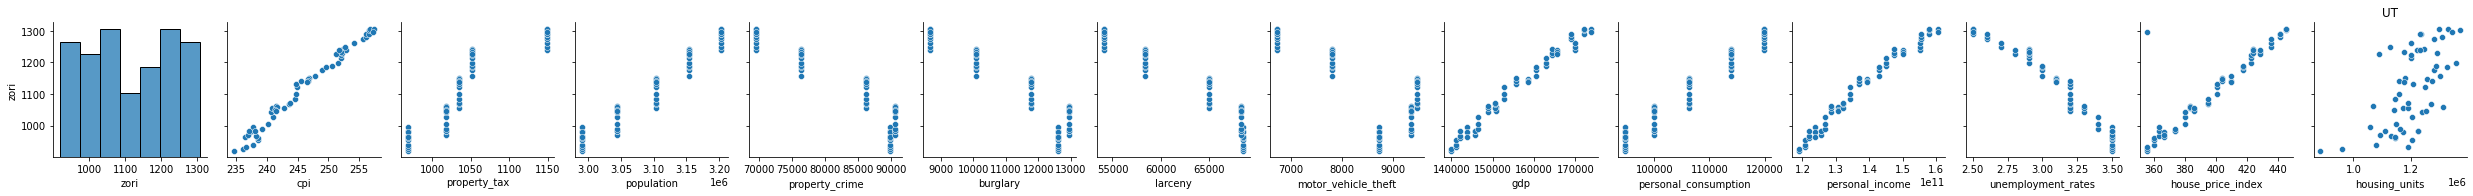

<Figure size 576x576 with 0 Axes>

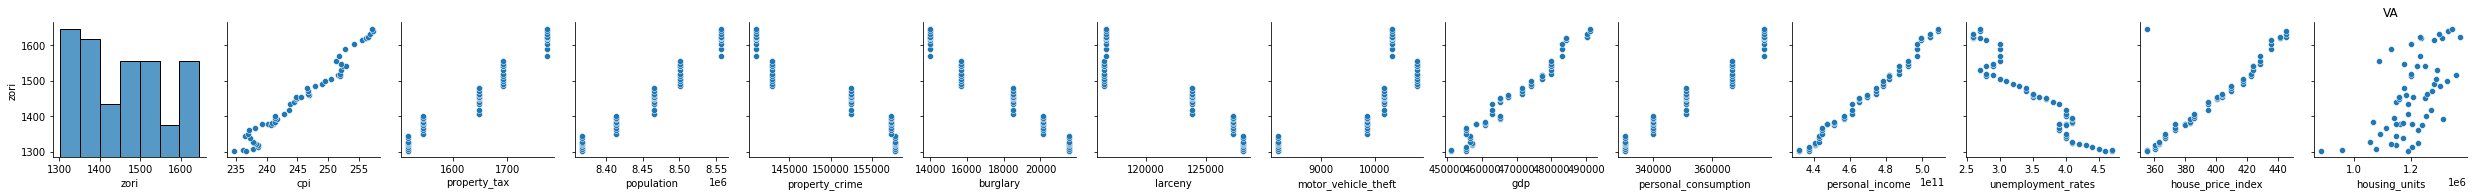

<Figure size 576x576 with 0 Axes>

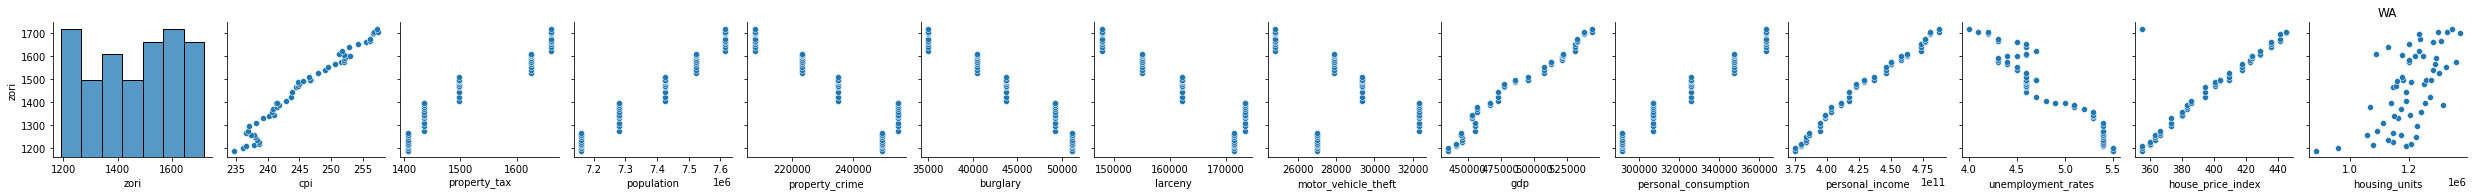

<Figure size 576x576 with 0 Axes>

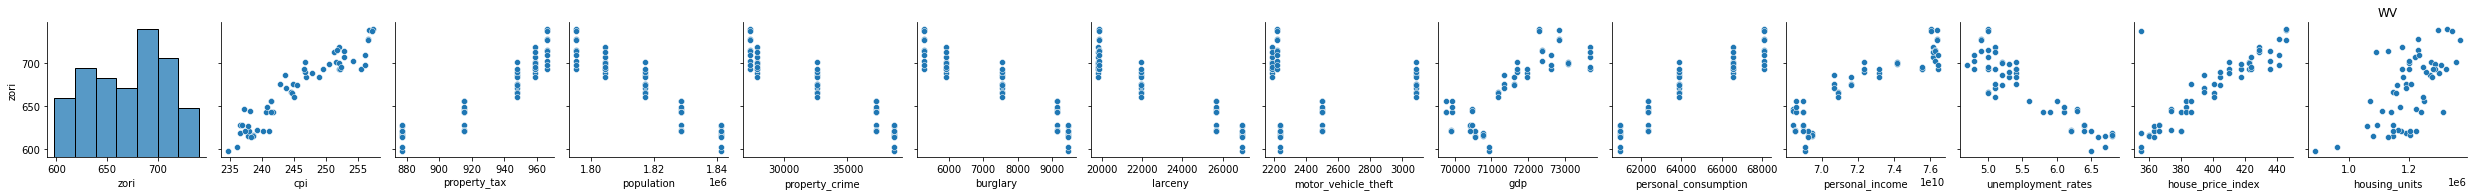

<Figure size 576x576 with 0 Axes>

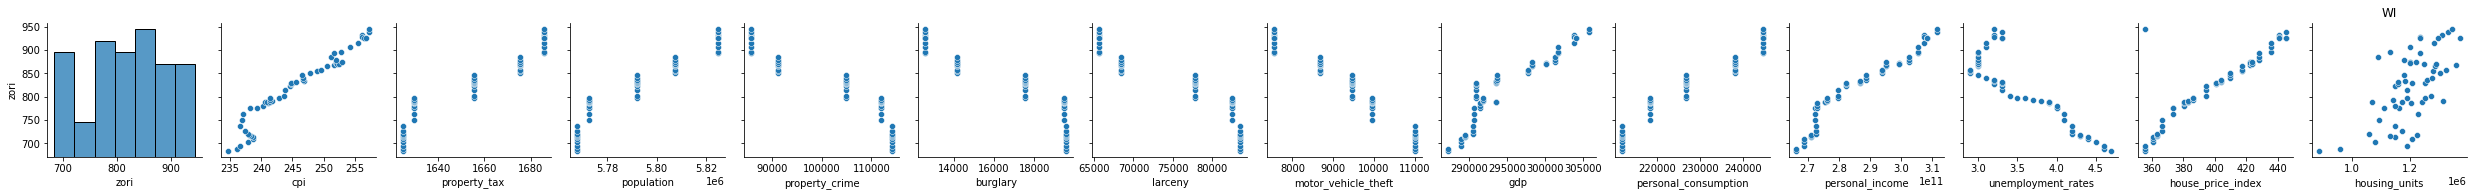

<Figure size 576x576 with 0 Axes>

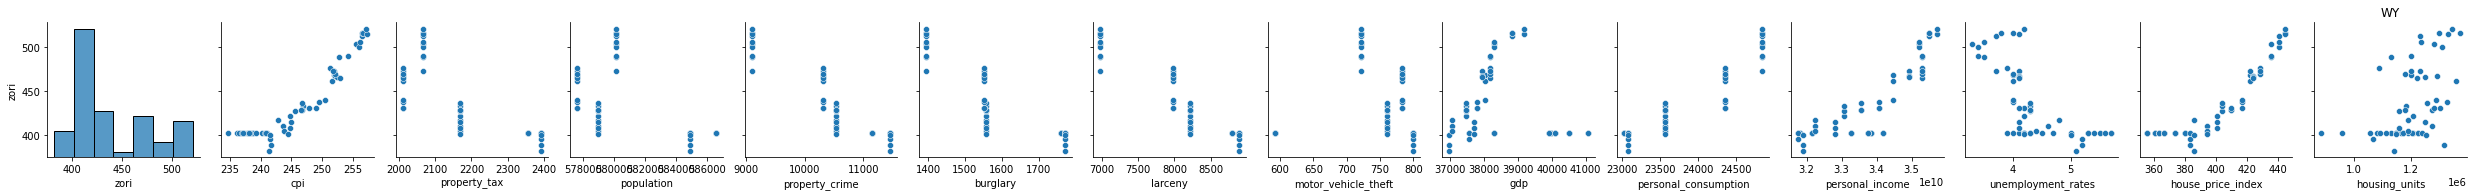

<Figure size 576x576 with 0 Axes>

In [60]:
state_abbrs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
no_data = []
for state in state_abbrs:
    state_data = data[data['State'] == state]
    if (data[data['State'] == state].empty):
        no_data.append(state)
        continue;
    # sns.pairplot(Zori_indicators, diag_kind = 'kde')
    sns.pairplot(
        state_data,
#         x_vars=[ 'cpi',
#                  'property_tax',
#                  'population',
#                  'property_crime',
#                  'burglary',
#                  'larceny',
#                  'motor_vehicle_theft',
#                  'gdp',
#                  'personal_consumption',
#                  'personal_income',
#                  'unemployment_rates',
#                  'house_price_index',
#                  'housing_units'],
        y_vars=['zori'],
    )
    plt.title(state)
    plt.figure(figsize=(8,8))
    plt.show()

We can clearly see that 
1. CPI, GDP, personal income, house price index have positive correlation to Zori index.
2. Unemployment rate has negative correlation to Zori index. 
3. Housing unites has weak correlation to Zori.

### the following states have no data

In [61]:
no_data

['AK', 'DC', 'MT', 'NM', 'VT']

## split data of all states into state_data, data_train, data_test

In [73]:
def splitTrainTestByState(data, state_name):
    state_data = data[data['State'] == state_name]
    mask_data_train = (state_data['Date'] <= end_train)
    mask_data_test  = (state_data['Date'] > end_train)
    return state_data, state_data.loc[mask_data_train], state_data.loc[mask_data_test]

In [74]:
end_train = '2019-01-01'
state_data, data_train, data_test = splitTrainTestByState(data, 'VA') ## select state name

## use boxplot to check the distribution

In [21]:
def boxPlot(input_data):
    plt.figure(figsize=(25, 10))
    plt.subplot(3,3,1)
    sns.boxplot(x = 'CPI', y = 'Zori', data = input_data)
    plt.subplot(3,3,2)
    sns.boxplot(x = 'Per Capita (dollars)', y = 'Zori', data = input_data)
    plt.subplot(3,3,3)
    sns.boxplot(x = 'population', y = 'Zori', data = input_data)
    plt.subplot(3,3,4)
    sns.boxplot(x = 'GDP', y = 'Zori', data = input_data)
    plt.subplot(3,3,5)
    sns.boxplot(x = 'state_personal_consumption', y = 'Zori', data = input_data)
    plt.subplot(3,3,6)
    sns.boxplot(x = 'Per capita', y = 'Zori', data = input_data)
    plt.subplot(3,3,7)
    sns.boxplot(x = 'Personal income', y = 'Zori', data = input_data)
    plt.subplot(3,3,8)
    sns.boxplot(x = 'Unemployment Rates', y = 'Zori', data = input_data)
    plt.show()
# boxPlot(VA_data_train)

In [22]:
# boxPlot(VA_data_train)

In [23]:
# boxPlot(VA_data_test)

# ElasticNet

In [88]:
#Log Transform SalePrice to improve normality
def logTransform(data):
    zori = data.Zori
    data.Zori = np.log(zori)

    print(data.Zori.describe())

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(zori.dropna() , fit=stats.norm);
    plt.subplot(1,2,2)
    _=stats.probplot(zori.dropna(), plot=plt)
    # Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print("train scores:")
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("test scores:")
    get_score(prediction_test, y_tst)
    
# ENModel = ElasticNetCV(alphas=[])
def dataDistribution(data):
    print(data.zori.describe())
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(data.zori.dropna() , fit=stats.norm);
    plt.subplot(1,2,2)
    _=stats.probplot(data.zori.dropna(), plot=plt)
def parseXnY(train_data, test_data):
    X_train = train_data.drop(['zori','State','Date'], axis = 1)
    y_train = train_data['zori']
    X_test = test_data.drop(['zori','State','Date'], axis = 1)
    y_test = test_data['zori']
    return X_train, y_train, X_test, y_test
def distributionAndSplitSets(data_train, data_test):
    dataDistribution(data_train)
    X_train, y_train, X_test, y_test = parseXnY(data_train, data_test)
    return X_train, y_train, X_test, y_test

count     48.000000
mean     852.906759
std       64.610794
min      757.299395
25%      795.667584
50%      839.951522
75%      903.078085
max      982.669106
Name: zori, dtype: float64
 
##### state name =  AL ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.9944548043877612
RMSE: 4.747783647033096
test scores:
R2: -0.31174126385465306
RMSE: 33.113813758388204
count      48.000000
mean     1011.057934
std        75.803818
min       887.547856
25%       948.271379
50%       997.898479
75%      1067.413173
max      1153.699563
Name: zori, dtype: float64
 
##### state name =  AZ ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.9983871697709745
RMSE: 3.009968605385543
test scores:
R2: -1.3105396213074583
RMSE: 47.37989343222463
count     48.000000
mean     758.649372
std       39.068238
min      699.107013
25%      722.805102
50%      7

 
##### state name =  MD ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.9911918798426739
RMSE: 6.394656261624245
test scores:
R2: -2.7272437999101493
RMSE: 43.98337140049909
count    4.800000e+01
mean     4.318645e+11
std      5.327763e+11
min      2.430350e+05
25%      4.971016e+06
50%      4.114543e+10
75%      8.904690e+11
max      1.694854e+12
Name: zori, dtype: float64
 
##### state name =  MA ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.8636245676044081
RMSE: 182610539558.50446
test scores:
R2: -5.211365433899218e-05
RMSE: 338409792434.19293
count      48.000000
mean      903.685781
std        65.328133
min       779.100438
25%       851.882580
50%       894.079183
75%       959.512590
max      1009.768100
Name: zori, dtype: float64
 
##### state name =  MI ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.

 
##### state name =  SD ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.9060281217291772
RMSE: 3.273726094115008
test scores:
R2: -0.00022866402964472066
RMSE: 25.167042514515494
count      48.000000
mean     1189.572868
std        64.790312
min      1030.998812
25%      1153.874251
50%      1200.034245
75%      1235.149289
max      1299.010510
Name: zori, dtype: float64
 
##### state name =  TN ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1],
             max_iter=5000)
train scores:
R2: 0.7277535295807402
RMSE: 29.61248402397629
test scores:
R2: -0.91531541785147
RMSE: 197.49312566967242
count      48.000000
mean     1155.282846
std        69.991629
min      1048.393872
25%      1103.767629
50%      1155.631088
75%      1222.577070
max      1275.073029
Name: zori, dtype: float64
 
##### state name =  TX ##### 
 
ElasticNetCV(alphas=[0.0001, 0.001, 0.0001], l1_ratio=[0.1, 1, 0.1

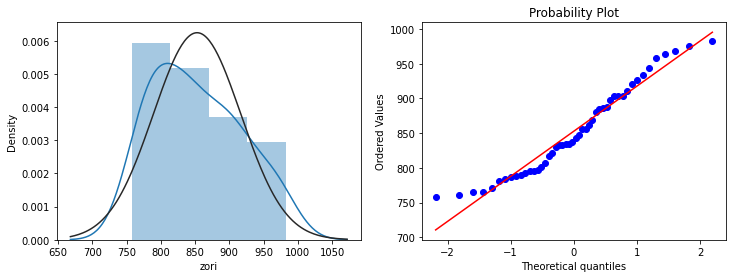

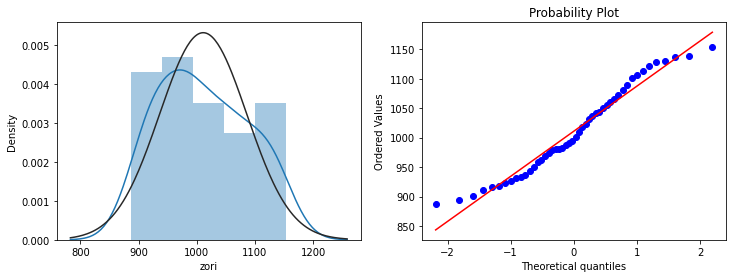

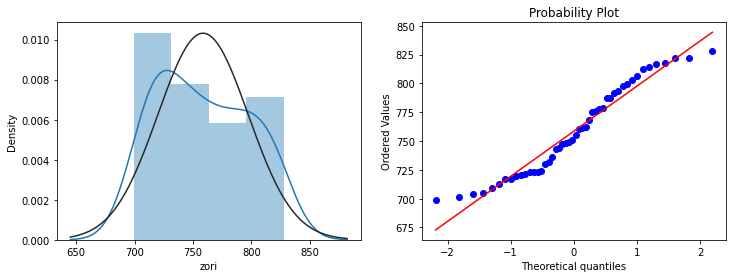

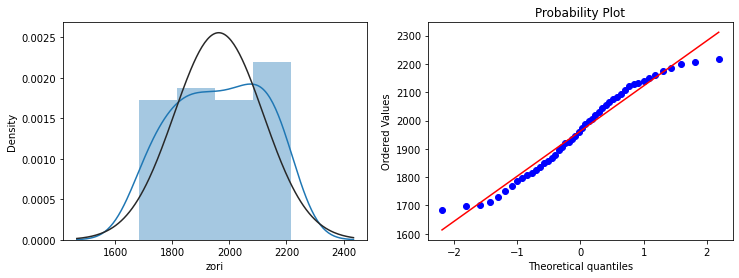

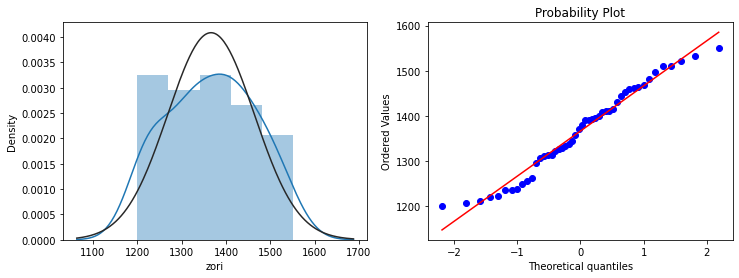

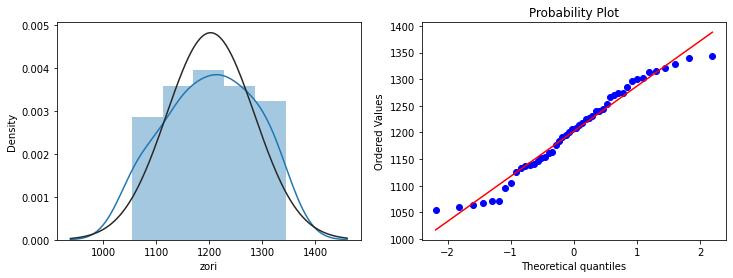

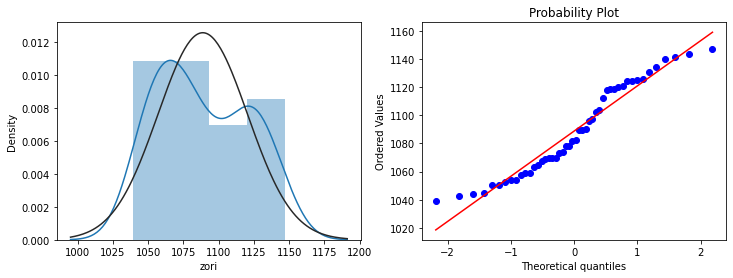

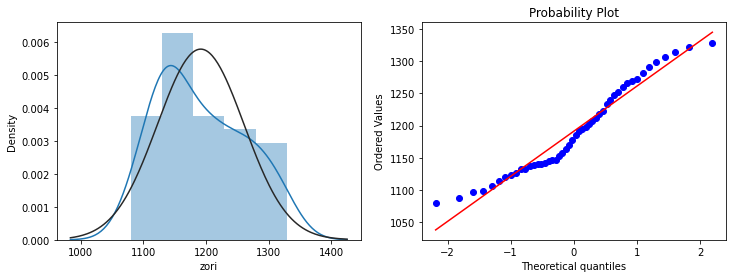

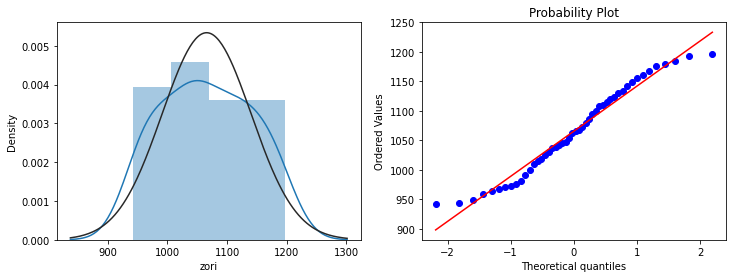

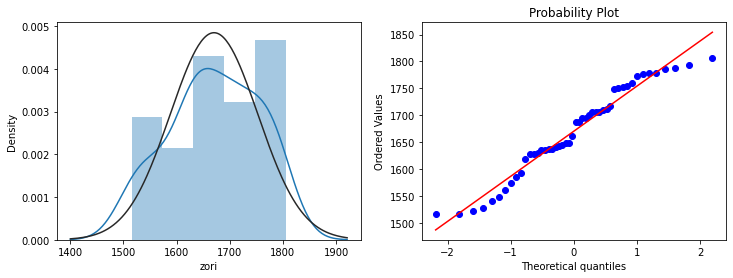

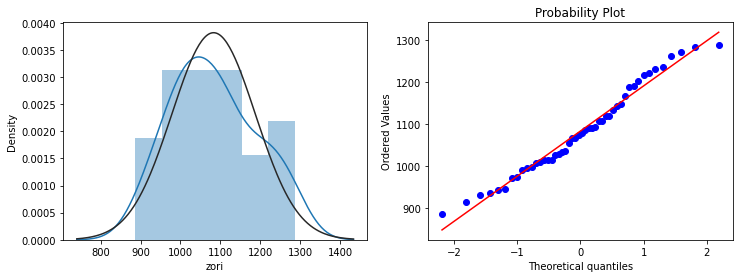

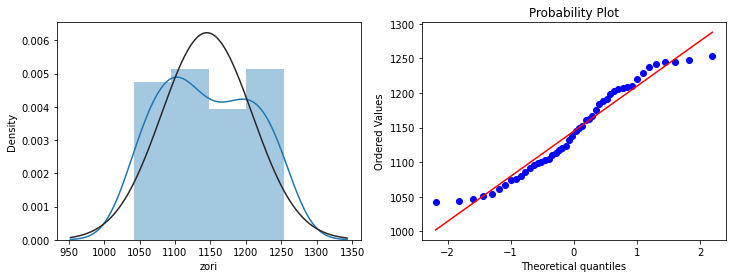

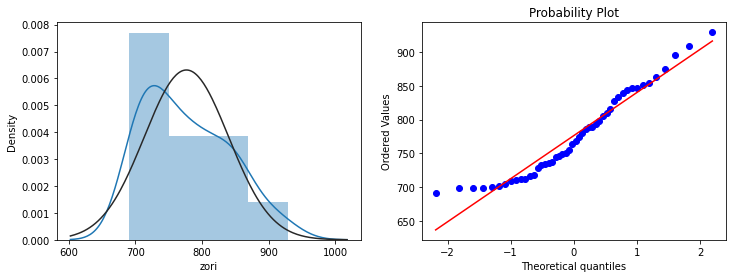

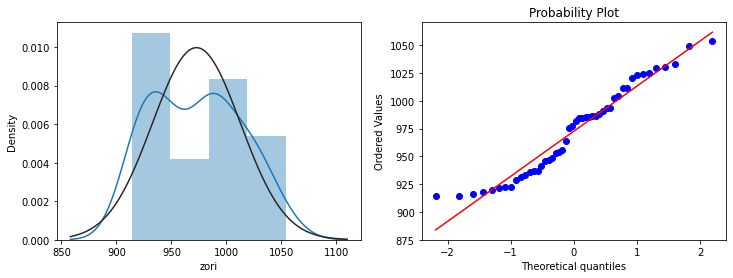

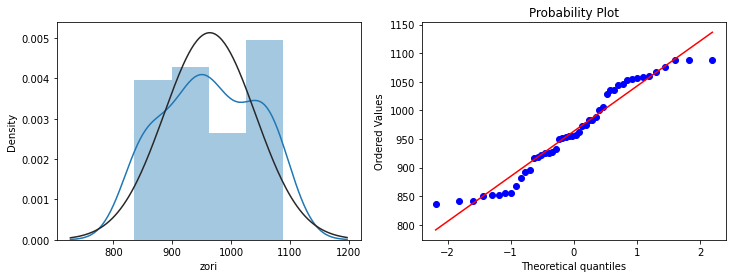

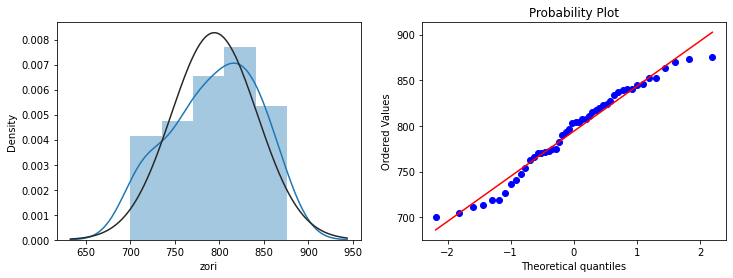

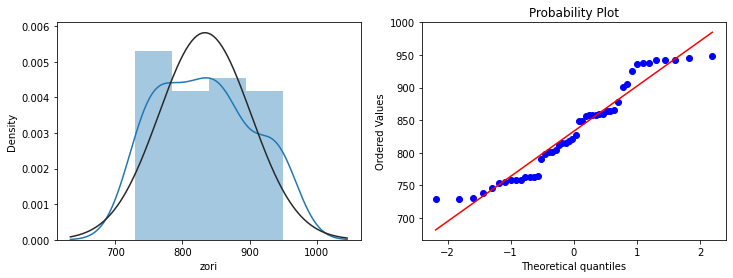

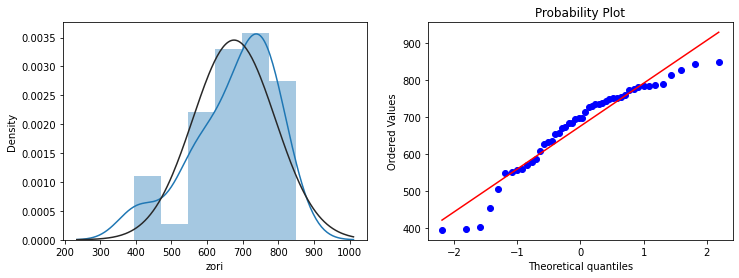

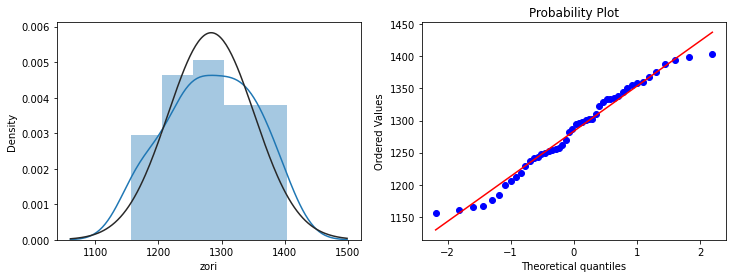

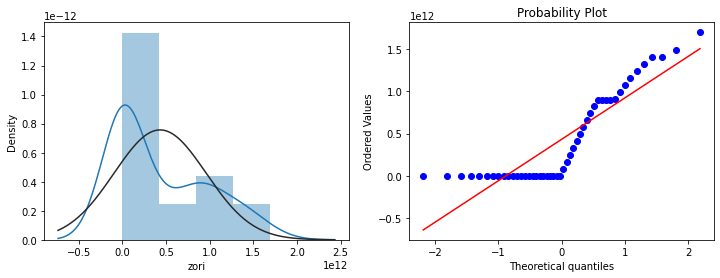

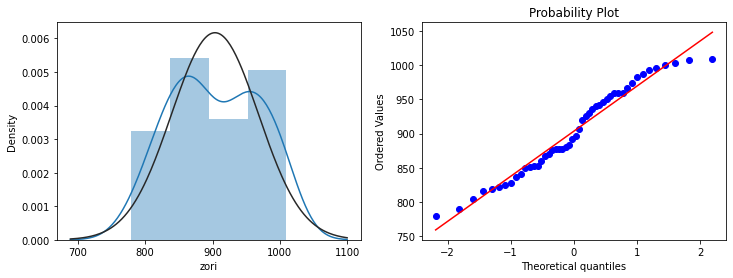

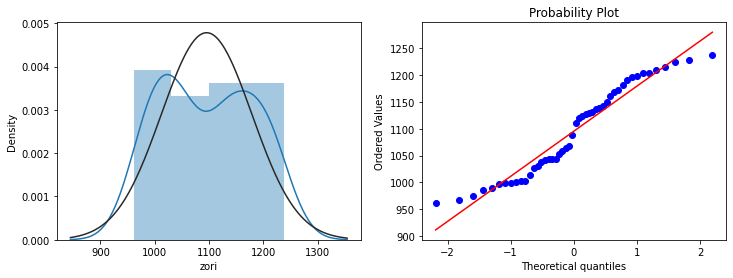

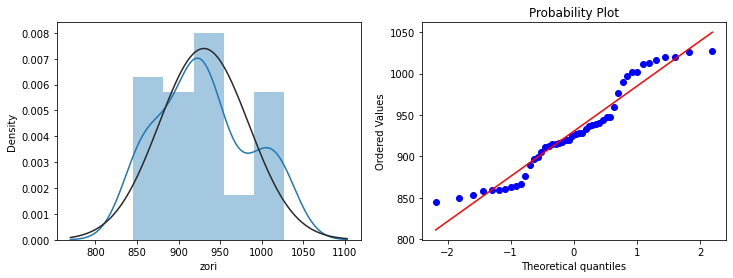

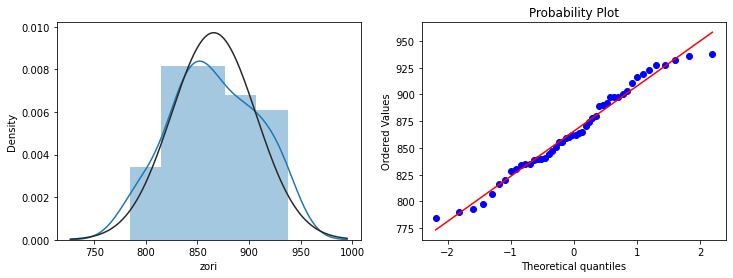

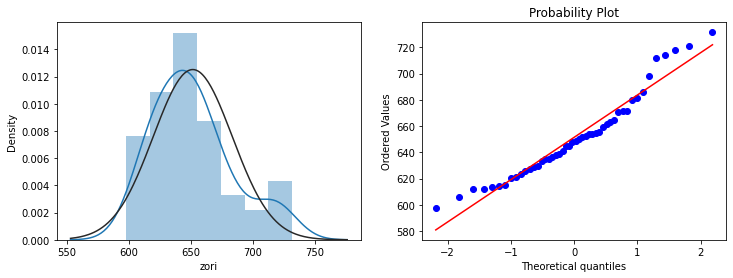

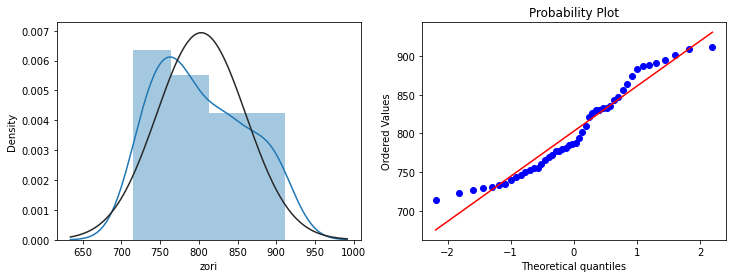

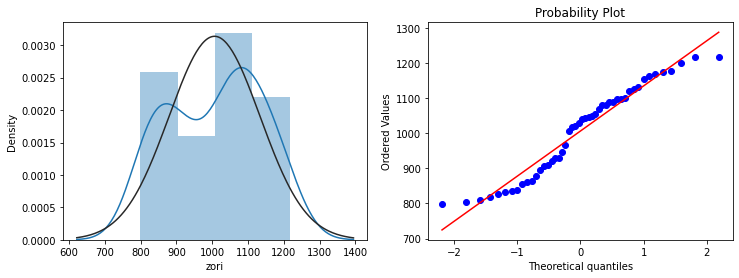

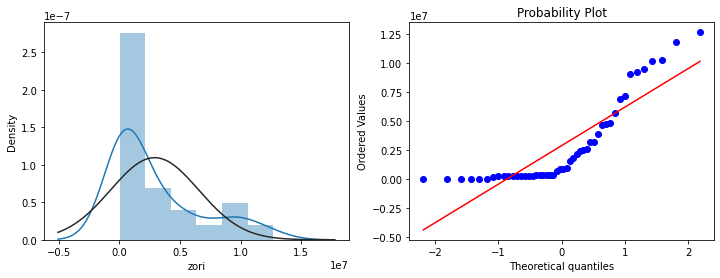

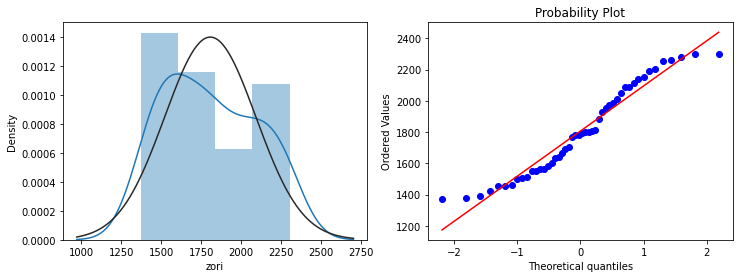

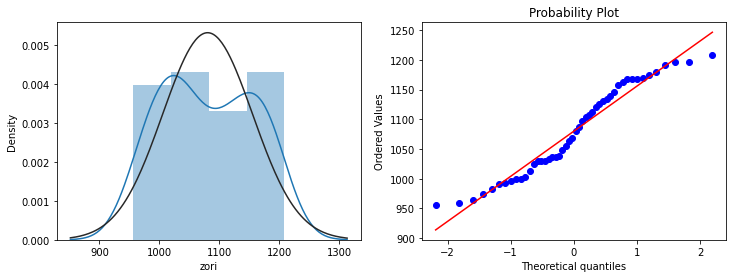

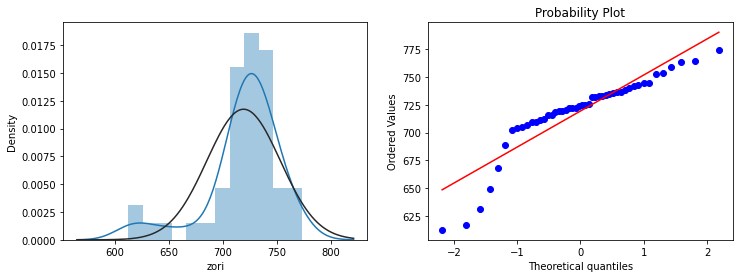

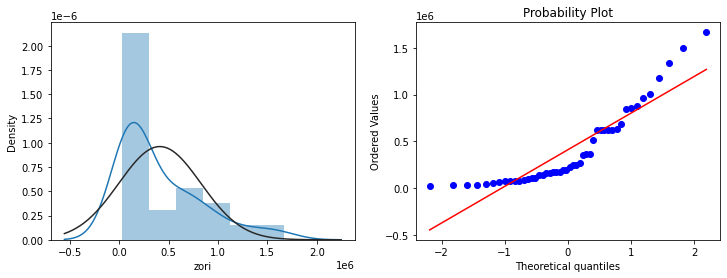

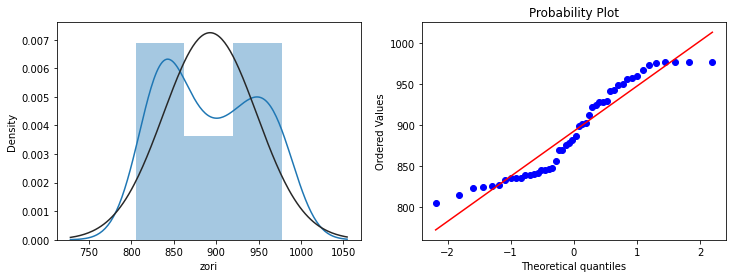

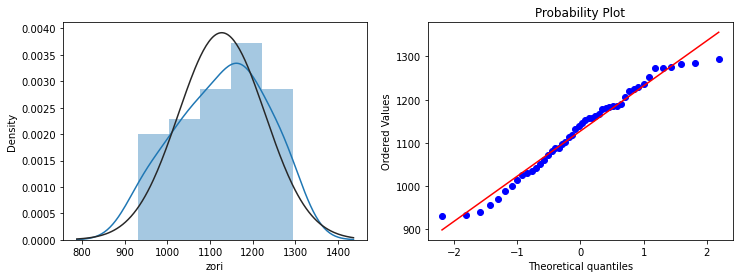

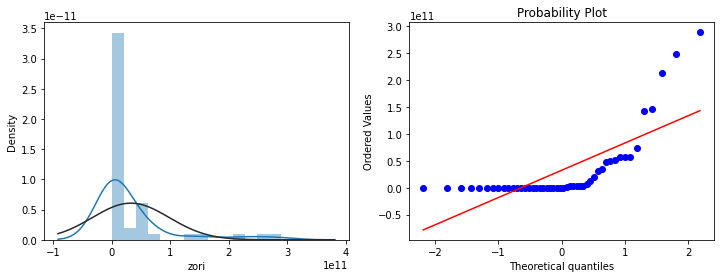

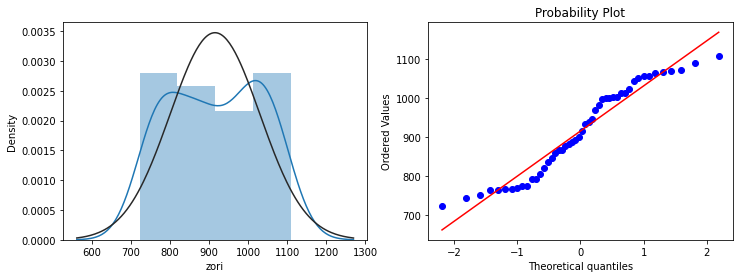

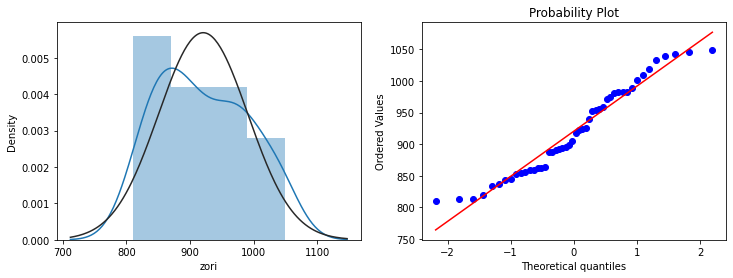

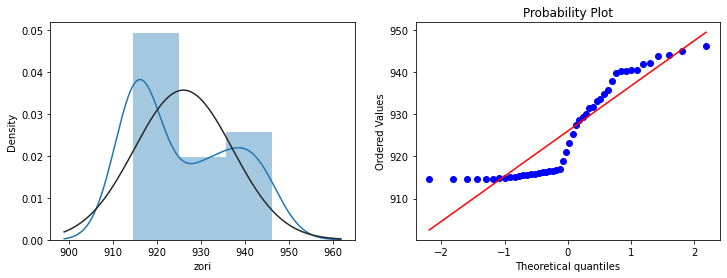

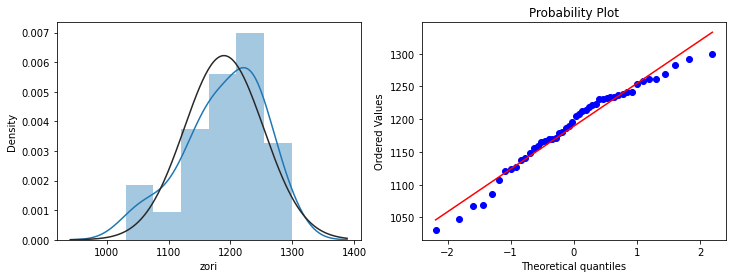

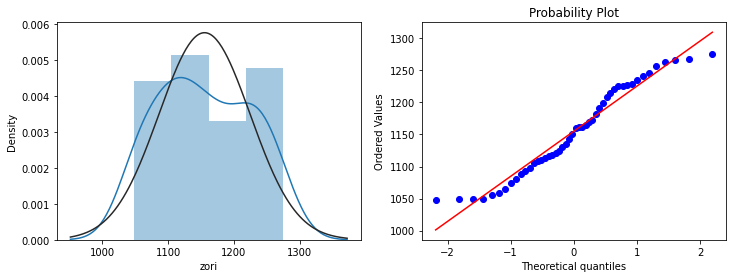

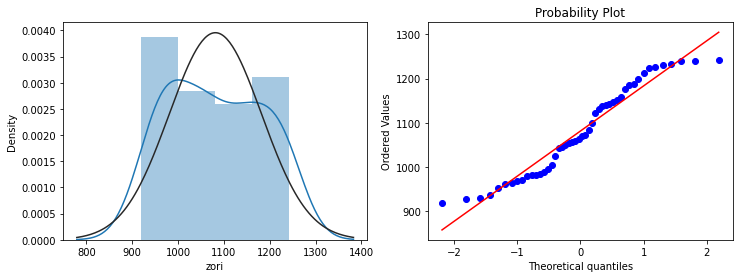

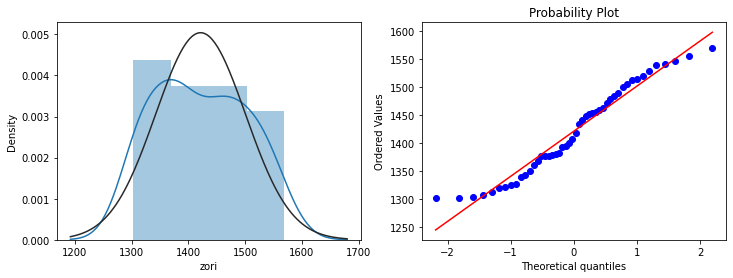

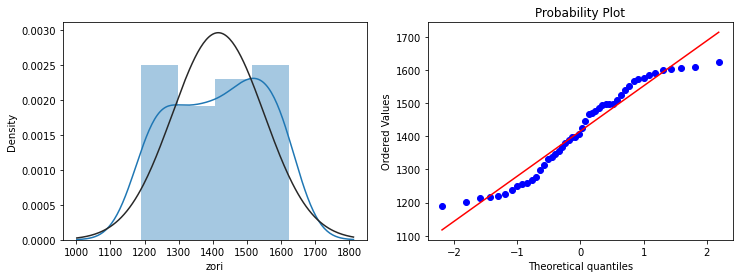

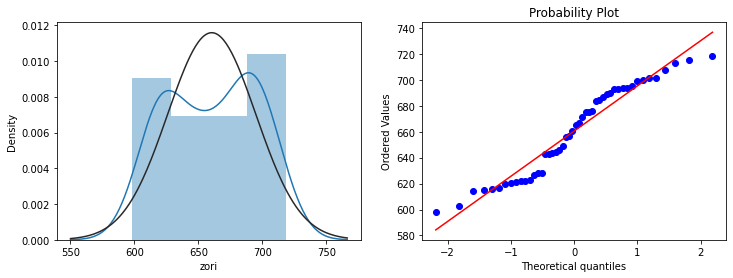

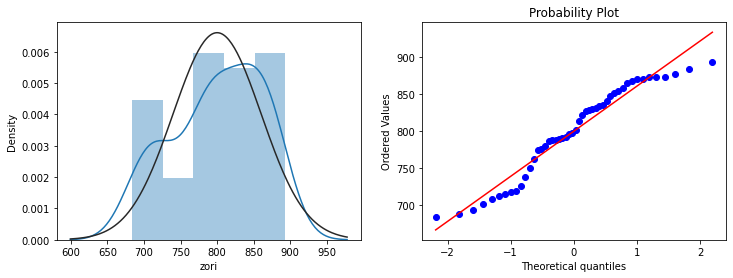

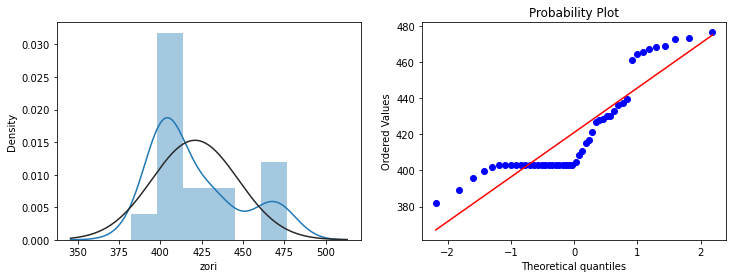

In [91]:
state_abbrs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
for state in state_abbrs:
    if (data[data['State'] == state].empty):
        continue;
    state_data, train_data, test_data = splitTrainTestByState(data, state) 
    state_data_train = train_data[train_data['State'] == state]
    state_data_test = test_data[test_data['State'] == state]
    
    X_train, y_train, X_test, y_test = distributionAndSplitSets(state_data_train, state_data_test)
    ENModel = ElasticNetCV(alphas=[1e-4,1e-3,1e-4], 
                           l1_ratio=[0.1, 1, 0.1], 
                           max_iter=5000).fit(X_train, y_train)
    print(' ')
    print('##### state name = ', state, '##### ')
    print(' ')
    train_test(ENModel, X_train, X_test, y_train, y_test)
    

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in)

# 🚨 in this experiment all the states shows good score in training data but test set. We shall move on to other non-linear models.